## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

## Chapter-010-14-TSP-01

In [1]:
import matplotlib
import numpy as np
matplotlib.use('TkAgg')
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [2]:
N_CITIES = 30  # DNA size
CROSS_RATE = 0.1
MUTATE_RATE = 0.02
POP_SIZE = 500
N_GENERATIONS = 250

In [3]:
class GA(object):
    def __init__(self, DNA_size, cross_rate, mutation_rate, pop_size, ):
        self.DNA_size = DNA_size
        self.cross_rate = cross_rate
        self.mutate_rate = mutation_rate
        self.pop_size = pop_size

        self.pop = np.vstack([np.random.permutation(DNA_size) for _ in range(pop_size)])

    def translateDNA(self, DNA, city_position):     # get cities' coord in order
        line_x = np.empty_like(DNA, dtype=np.float64)
        line_y = np.empty_like(DNA, dtype=np.float64)
        for i, d in enumerate(DNA):
            city_coord = city_position[d]
            line_x[i, :] = city_coord[:, 0]
            line_y[i, :] = city_coord[:, 1]
        return line_x, line_y

    def get_fitness(self, line_x, line_y):
        total_distance = np.empty((line_x.shape[0],), dtype=np.float64)
        for i, (xs, ys) in enumerate(zip(line_x, line_y)):
            total_distance[i] = np.sum(np.sqrt(np.square(np.diff(xs)) + np.square(np.diff(ys))))
        fitness = np.exp(self.DNA_size * 2 / total_distance)
        return fitness, total_distance

    def select(self, fitness):
        idx = np.random.choice(np.arange(self.pop_size), size=self.pop_size, replace=True, p=fitness / fitness.sum())
        return self.pop[idx]

    def crossover(self, parent, pop):
        if np.random.rand() < self.cross_rate:
            i_ = np.random.randint(0, self.pop_size, size=1)                        # select another individual from pop
            cross_points = np.random.randint(0, 2, self.DNA_size).astype(np.bool)   # choose crossover points
            keep_city = parent[~cross_points]                                       # find the city number
            swap_city = pop[i_, np.isin(pop[i_].ravel(), keep_city, invert=True)]
            parent[:] = np.concatenate((keep_city, swap_city))
        return parent

    def mutate(self, child):
        for point in range(self.DNA_size):
            if np.random.rand() < self.mutate_rate:
                swap_point = np.random.randint(0, self.DNA_size)
                swapA, swapB = child[point], child[swap_point]
                child[point], child[swap_point] = swapB, swapA
        return child

    def evolve(self, fitness):
        pop = self.select(fitness)
        pop_copy = pop.copy()
        for parent in pop:  # for every parent
            child = self.crossover(parent, pop_copy)
            child = self.mutate(child)
            parent[:] = child
        self.pop = pop





In [4]:
class TravelSalesPerson(object):
    def __init__(self, n_cities):
        self.city_position = np.random.rand(n_cities, 2)
        plt.ion()

    def plotting(self, lx, ly, total_d):
        fig=plt.figure(figsize=(6,6))
        plt.cla()
        plt.scatter(self.city_position[:, 0].T, self.city_position[:, 1].T, s=100, c='k')
        plt.plot(lx.T, ly.T, 'r-')
        plt.text(-0.05, -0.05, "Total distance=%.2f" % total_d, fontdict={'size': 20, 'color': 'red'})
        plt.xlim((-0.1, 1.1))
        plt.ylim((-0.1, 1.1))
        plt.pause(0.01)

In [5]:
ga = GA(DNA_size=N_CITIES, cross_rate=CROSS_RATE, mutation_rate=MUTATE_RATE, pop_size=POP_SIZE)

env = TravelSalesPerson(N_CITIES)

In [6]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

Gen: 0 | best fit: 652.03


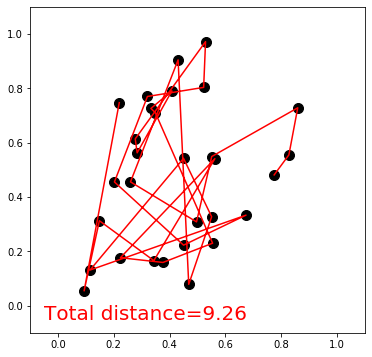

Gen: 1 | best fit: 717.76


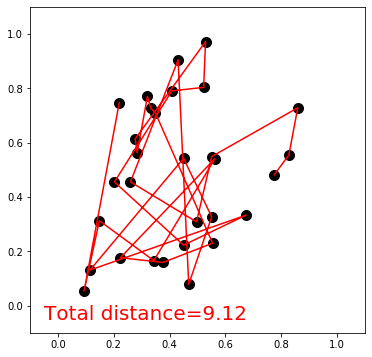

Gen: 2 | best fit: 733.31


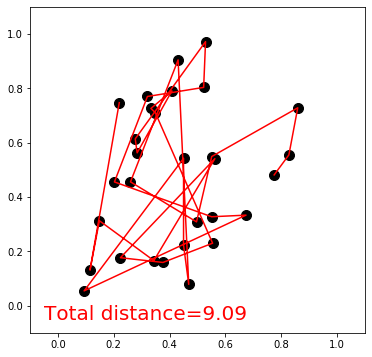

Gen: 3 | best fit: 1128.76


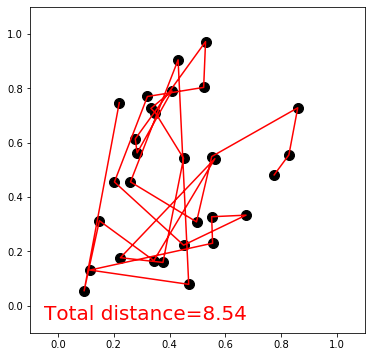

Gen: 4 | best fit: 1137.99


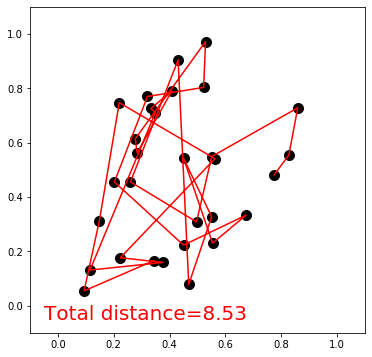

Gen: 5 | best fit: 1339.33


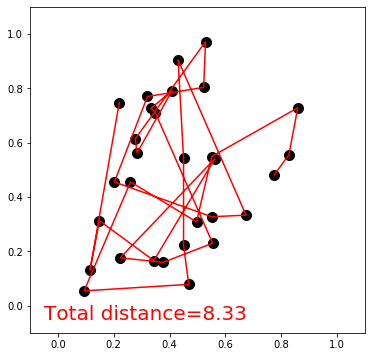

Gen: 6 | best fit: 1364.18


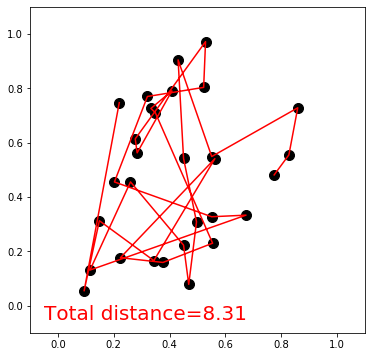

Gen: 7 | best fit: 2374.45


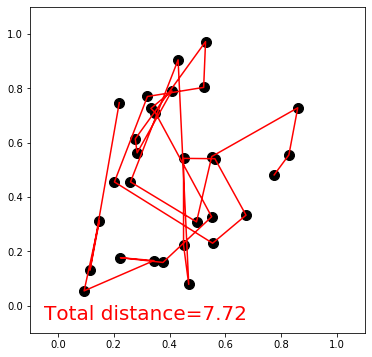

Gen: 8 | best fit: 2374.45


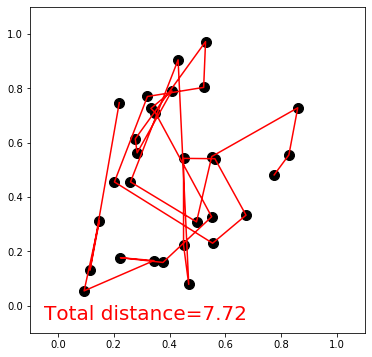

Gen: 9 | best fit: 3358.52


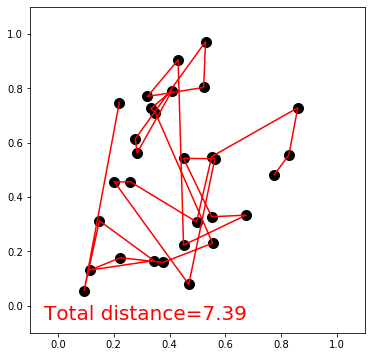

Gen: 10 | best fit: 3358.52


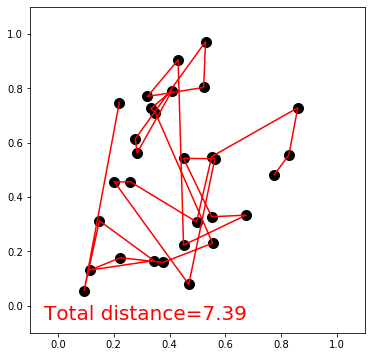

Gen: 11 | best fit: 4102.46


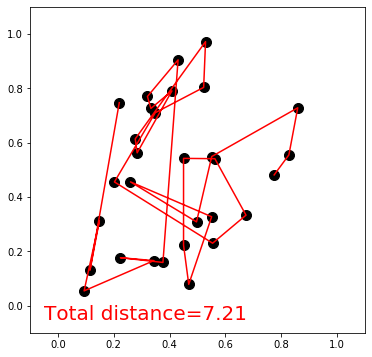

Gen: 12 | best fit: 4250.74


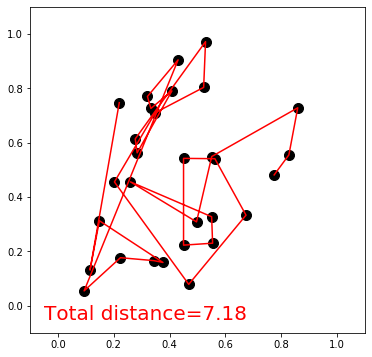

Gen: 13 | best fit: 4250.74


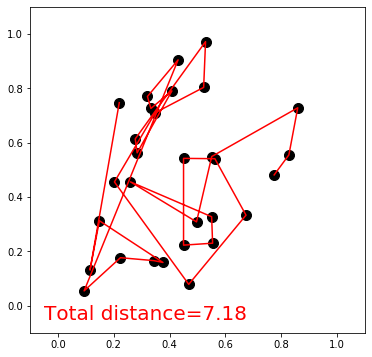

Gen: 14 | best fit: 5413.13


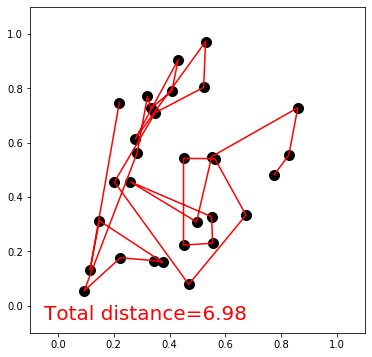

Gen: 15 | best fit: 12194.40


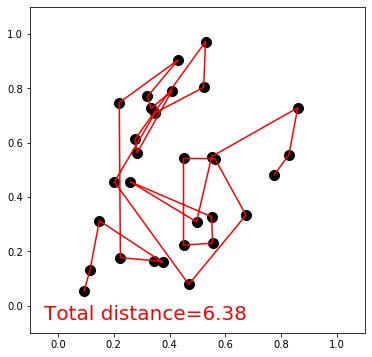

Gen: 16 | best fit: 12194.40


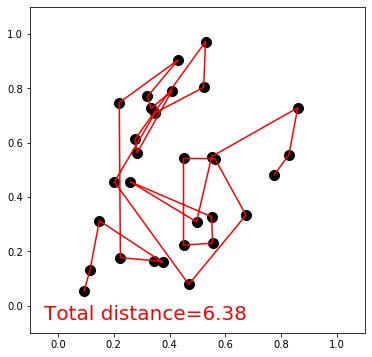

Gen: 17 | best fit: 12194.40


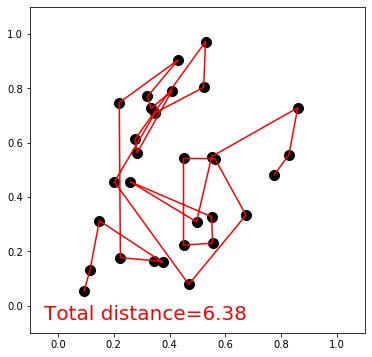

Gen: 18 | best fit: 16382.53


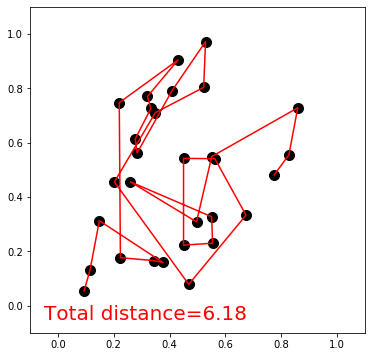

Gen: 19 | best fit: 16382.53


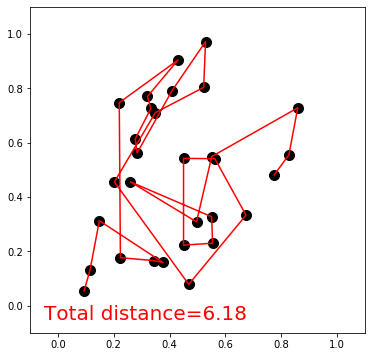

Gen: 20 | best fit: 16382.53


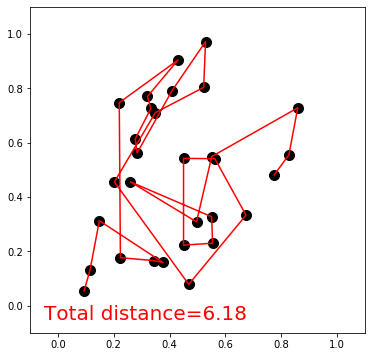

Gen: 21 | best fit: 16597.26


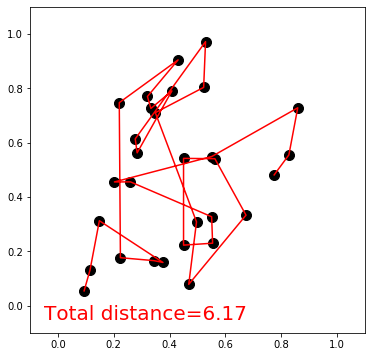

Gen: 22 | best fit: 16597.26


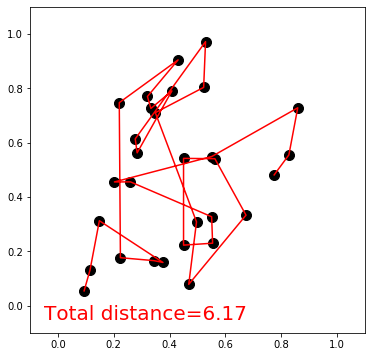

Gen: 23 | best fit: 16597.26


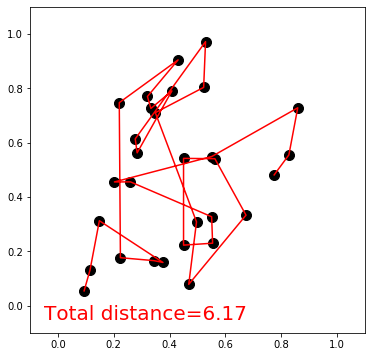

Gen: 24 | best fit: 19575.24


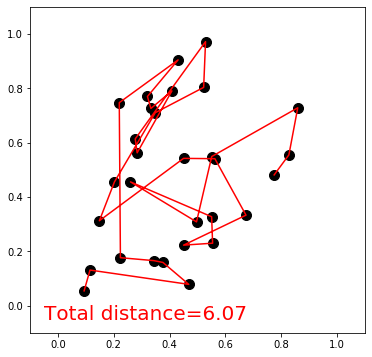

Gen: 25 | best fit: 19575.24


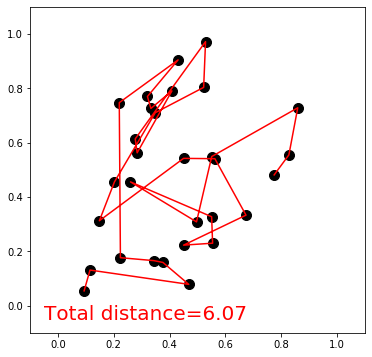

Gen: 26 | best fit: 20509.72


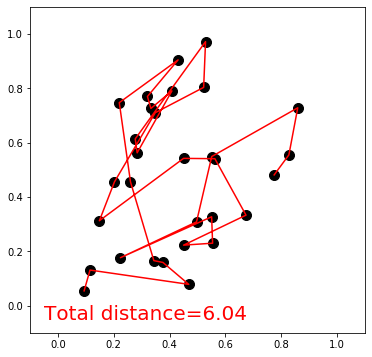

Gen: 27 | best fit: 26594.24


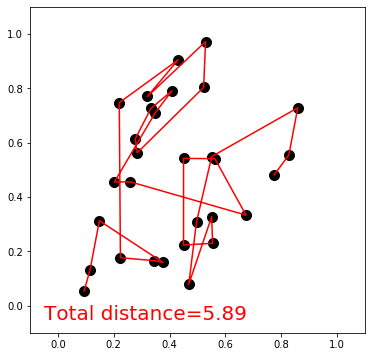

Gen: 28 | best fit: 26594.24


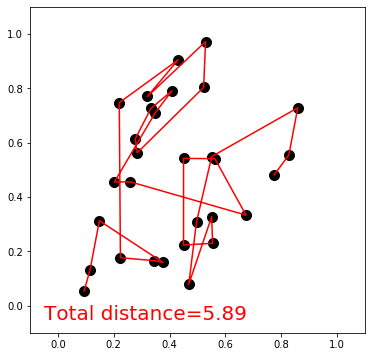

Gen: 29 | best fit: 27024.53


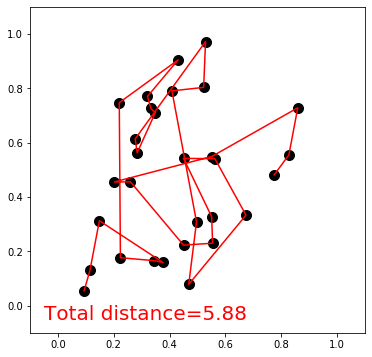

Gen: 30 | best fit: 27024.53


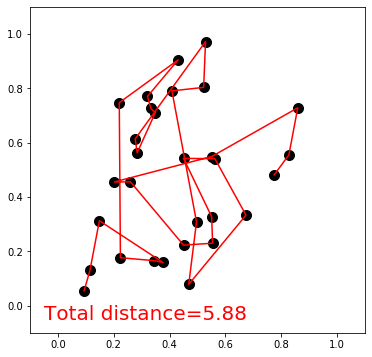

Gen: 31 | best fit: 27024.53


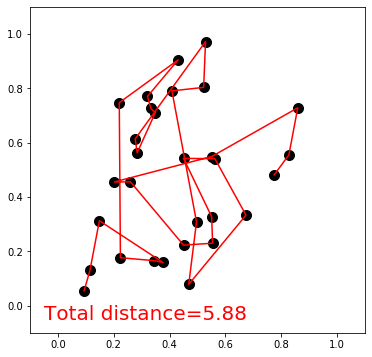

Gen: 32 | best fit: 27024.53


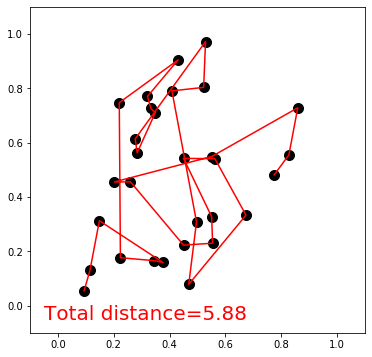

Gen: 33 | best fit: 27469.86


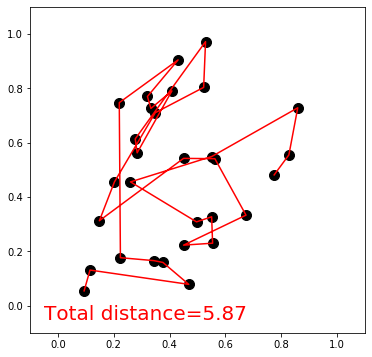

Gen: 34 | best fit: 48747.40


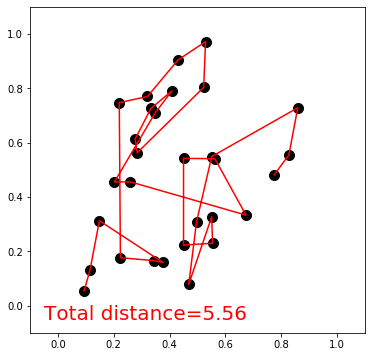

Gen: 35 | best fit: 48747.40


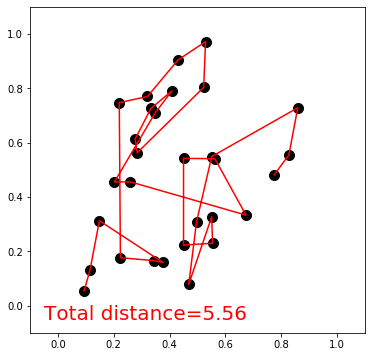

Gen: 36 | best fit: 48747.40


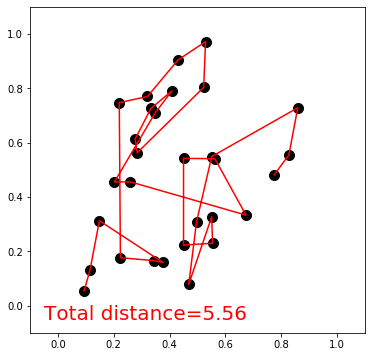

Gen: 37 | best fit: 48747.40


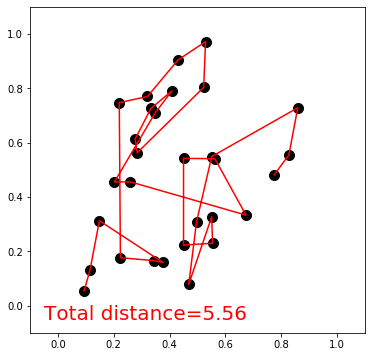

Gen: 38 | best fit: 48747.40


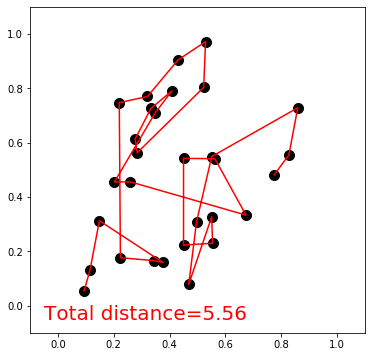

Gen: 39 | best fit: 48747.40


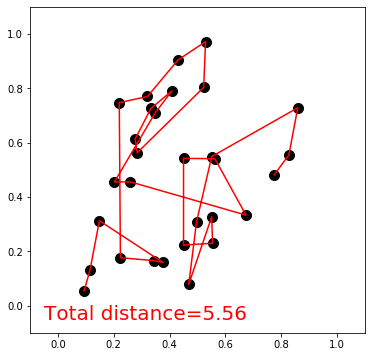

Gen: 40 | best fit: 97560.79


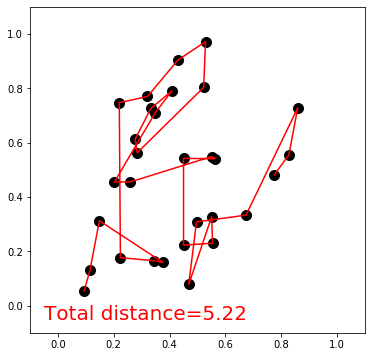

Gen: 41 | best fit: 97560.79


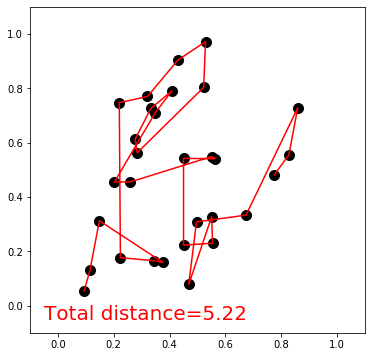

Gen: 42 | best fit: 97560.79


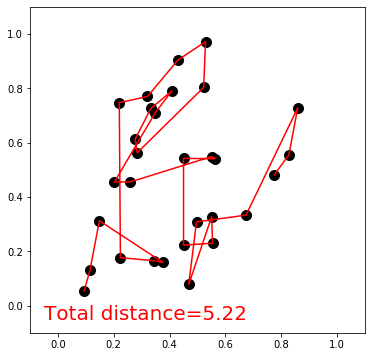

Gen: 43 | best fit: 110272.69


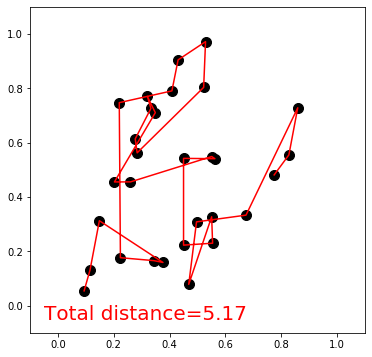

Gen: 44 | best fit: 129479.19


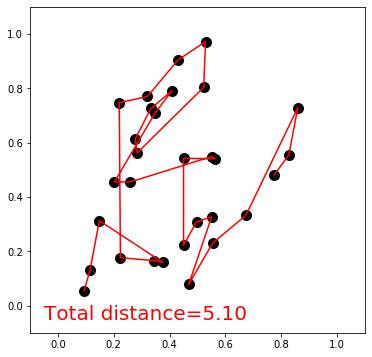

Gen: 45 | best fit: 129479.19


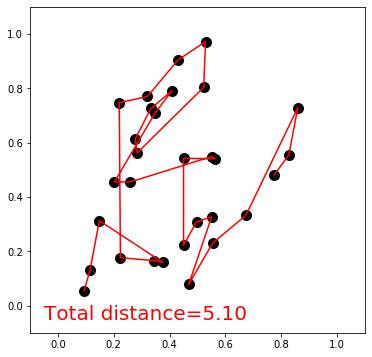

Gen: 46 | best fit: 129479.19


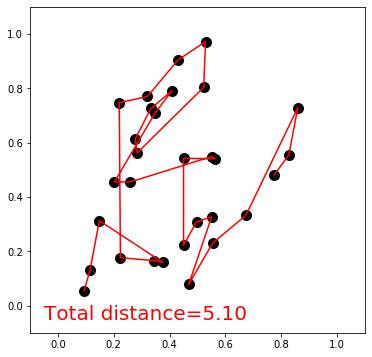

Gen: 47 | best fit: 129479.19


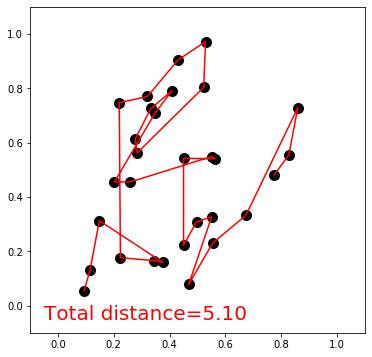

Gen: 48 | best fit: 129479.19


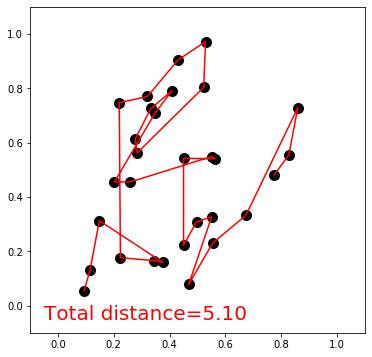

Gen: 49 | best fit: 129479.19


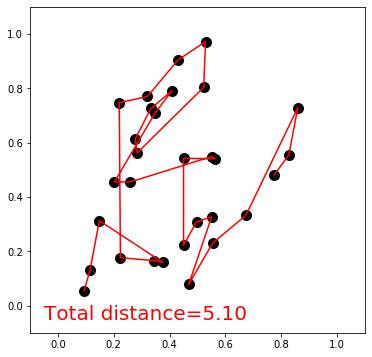

Gen: 50 | best fit: 129479.19


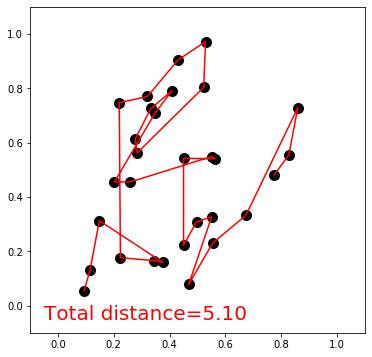

Gen: 51 | best fit: 176878.37


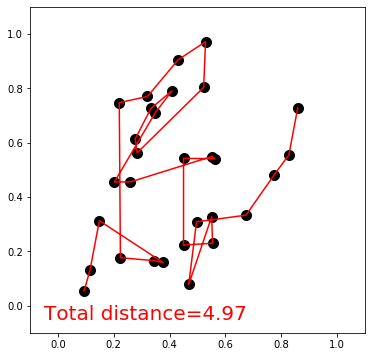

Gen: 52 | best fit: 176878.37


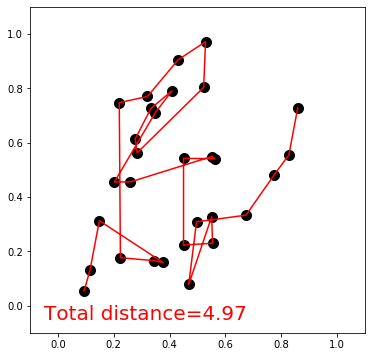

Gen: 53 | best fit: 176878.37


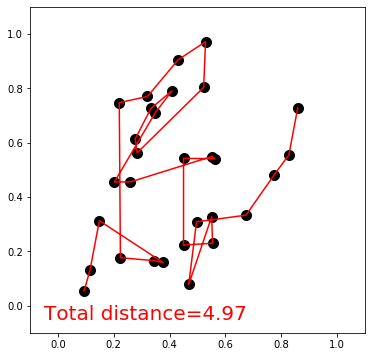

Gen: 54 | best fit: 176878.37


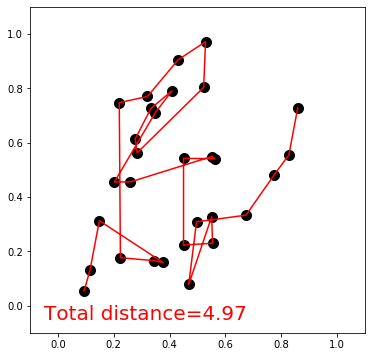

Gen: 55 | best fit: 176878.37


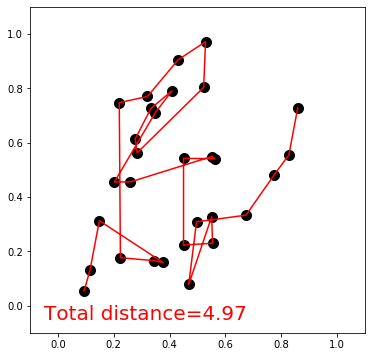

Gen: 56 | best fit: 176878.37


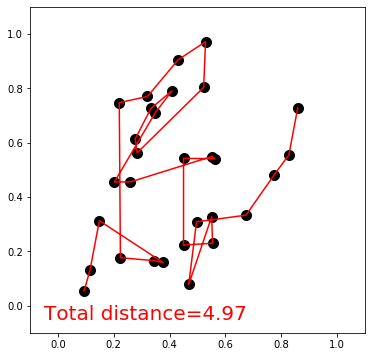

Gen: 57 | best fit: 225326.48


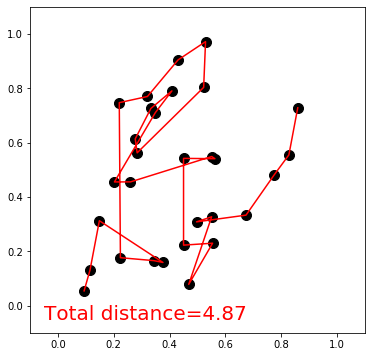

Gen: 58 | best fit: 225326.48


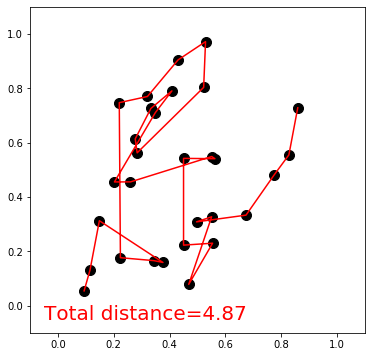

Gen: 59 | best fit: 225326.48


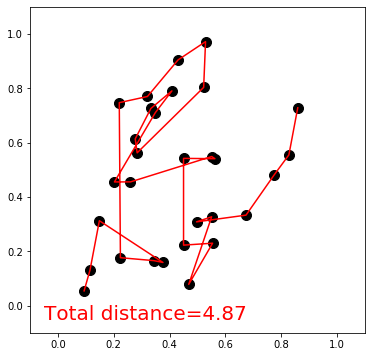

Gen: 60 | best fit: 225326.48


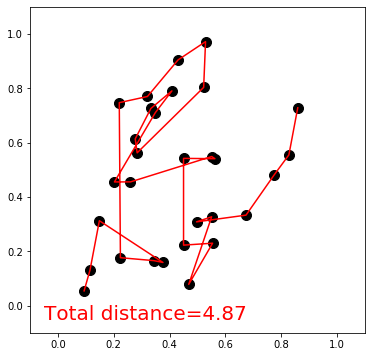

Gen: 61 | best fit: 261756.88


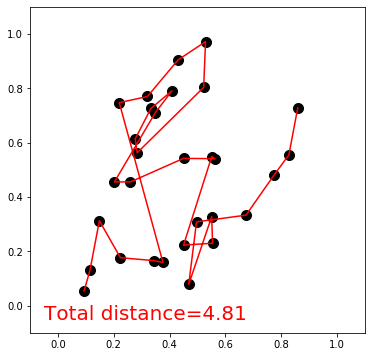

Gen: 62 | best fit: 261756.88


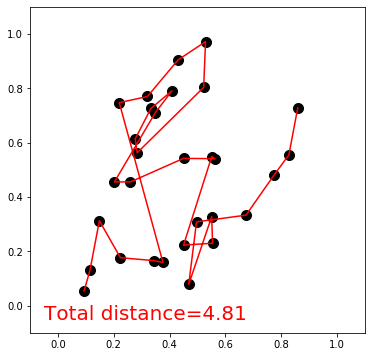

Gen: 63 | best fit: 281366.20


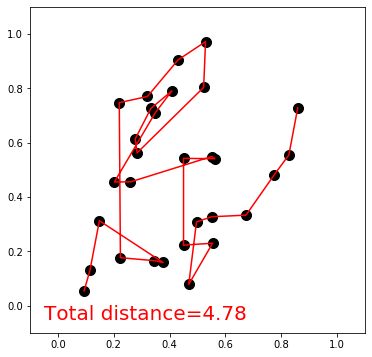

Gen: 64 | best fit: 281366.20


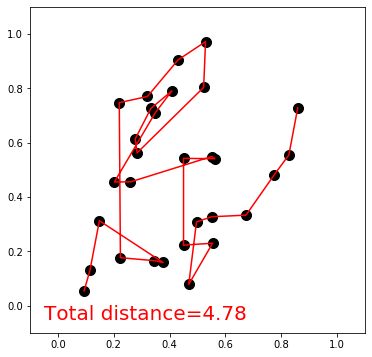

Gen: 65 | best fit: 281366.20


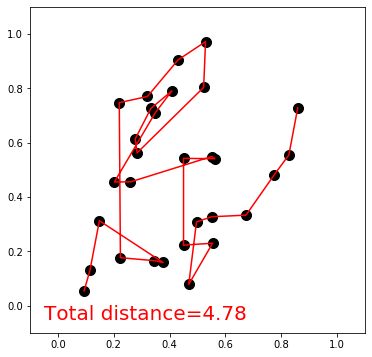

Gen: 66 | best fit: 281366.20


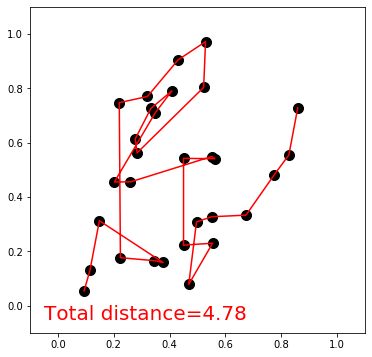

Gen: 67 | best fit: 310575.40


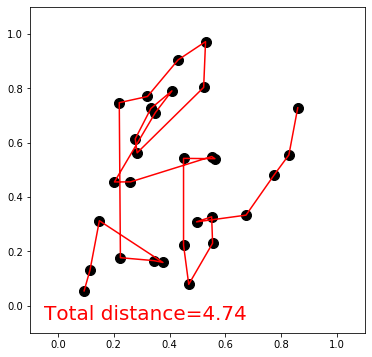

Gen: 68 | best fit: 630120.62


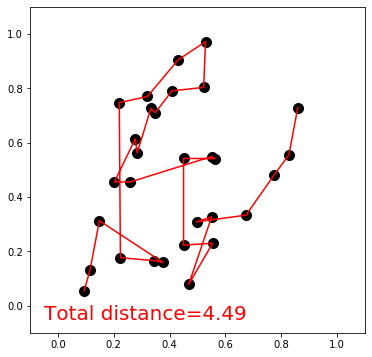

Gen: 69 | best fit: 919091.65


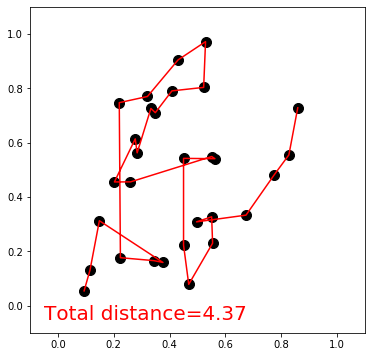

Gen: 70 | best fit: 919091.65


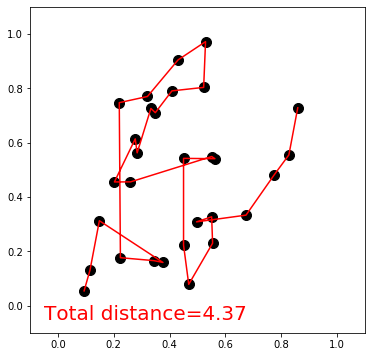

Gen: 71 | best fit: 1739973.82


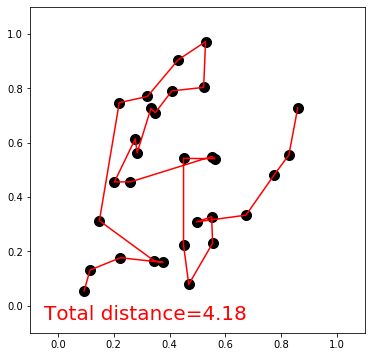

Gen: 72 | best fit: 1739973.82


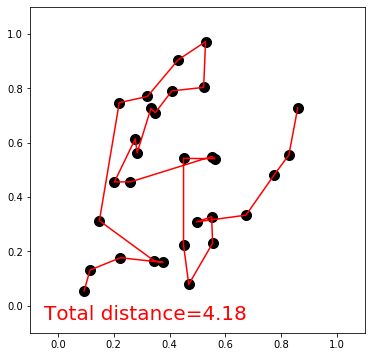

Gen: 73 | best fit: 1739973.82


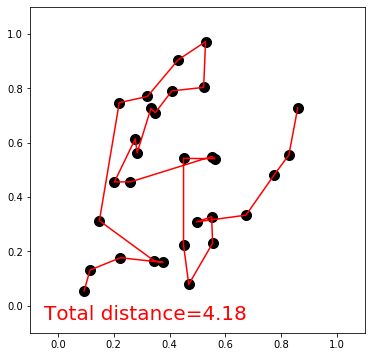

Gen: 74 | best fit: 1755883.85


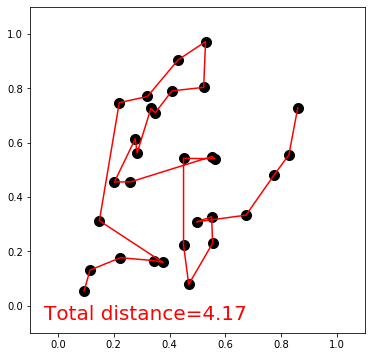

Gen: 75 | best fit: 1901475.15


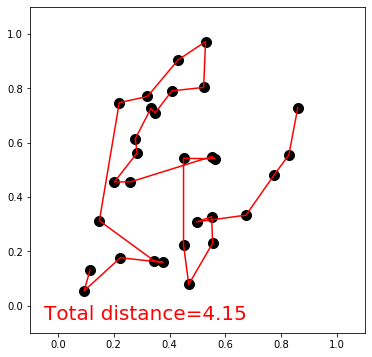

Gen: 76 | best fit: 1901475.15


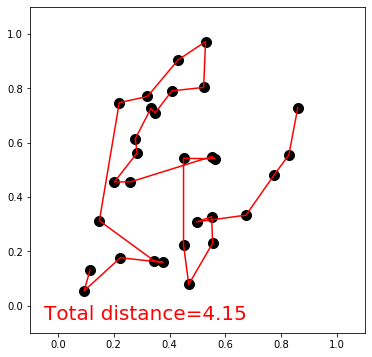

Gen: 77 | best fit: 1901475.15


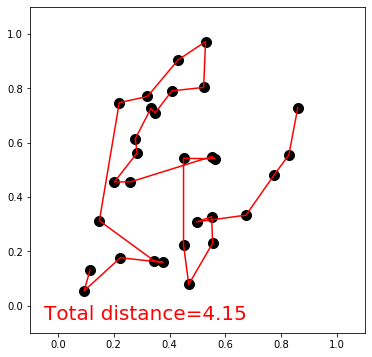

Gen: 78 | best fit: 2353143.78


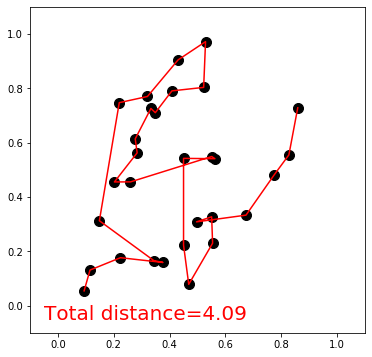

Gen: 79 | best fit: 2353143.78


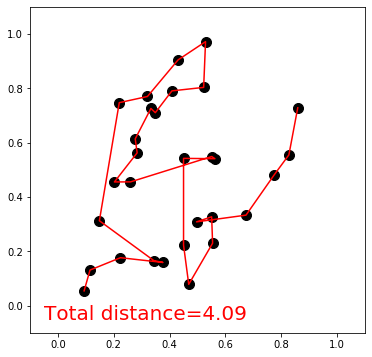

Gen: 80 | best fit: 2353143.78


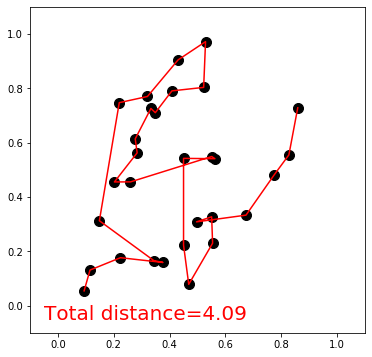

Gen: 81 | best fit: 2353143.78


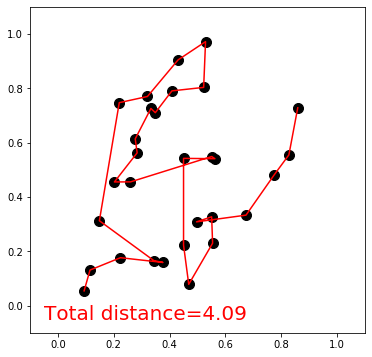

Gen: 82 | best fit: 2353143.78


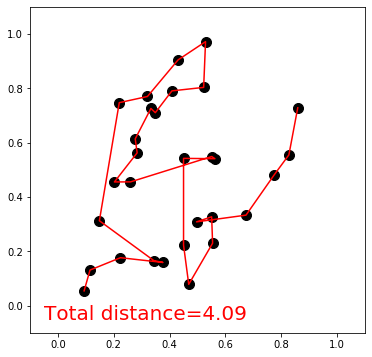

Gen: 83 | best fit: 2353143.78


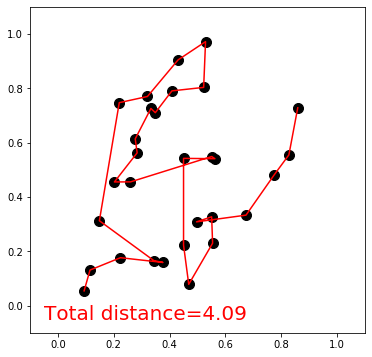

Gen: 84 | best fit: 2353143.78


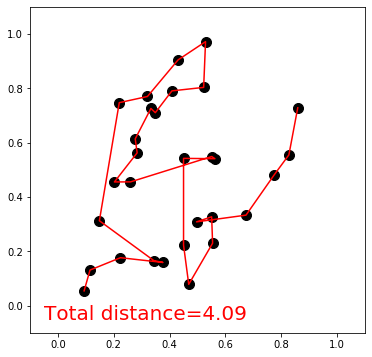

Gen: 85 | best fit: 2478997.19


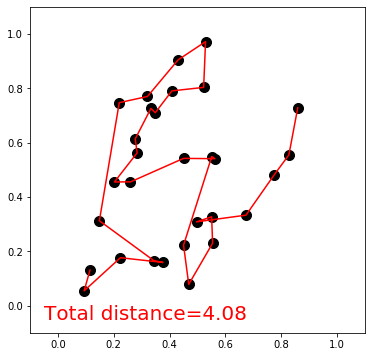

Gen: 86 | best fit: 2478997.19


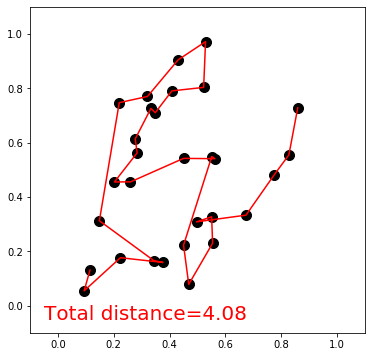

Gen: 87 | best fit: 2478997.19


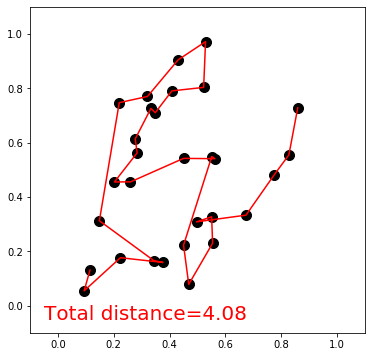

Gen: 88 | best fit: 2478997.19


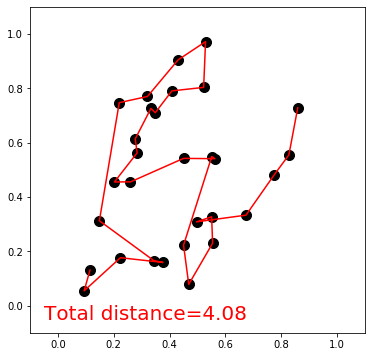

Gen: 89 | best fit: 2528706.70


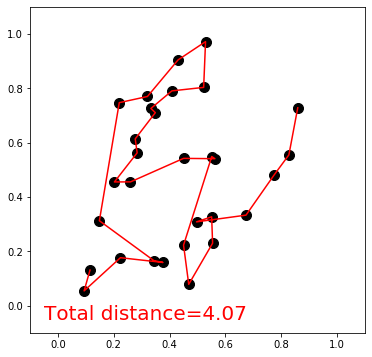

Gen: 90 | best fit: 2766536.47


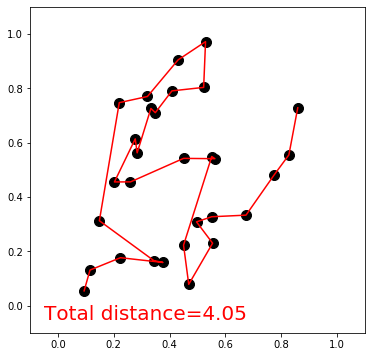

Gen: 91 | best fit: 2766536.47


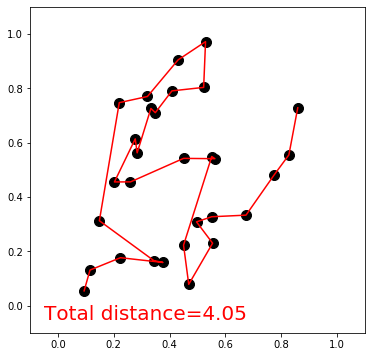

Gen: 92 | best fit: 2766536.47


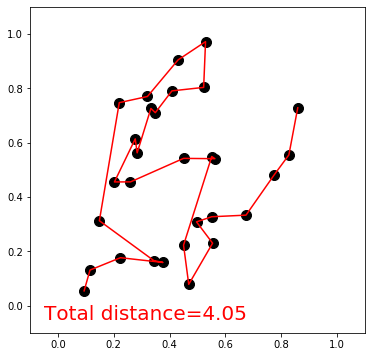

Gen: 93 | best fit: 2766536.47


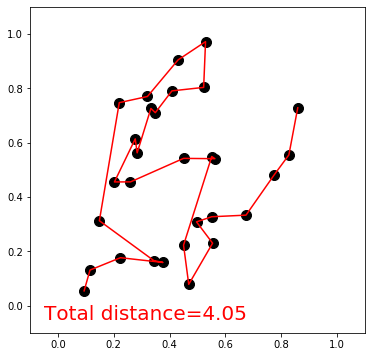

Gen: 94 | best fit: 2766536.47


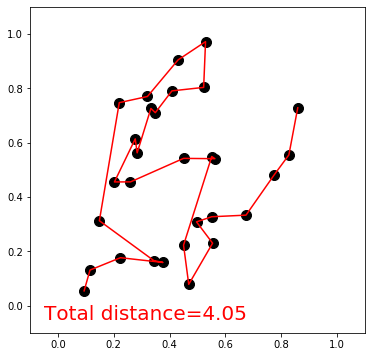

Gen: 95 | best fit: 2766536.47


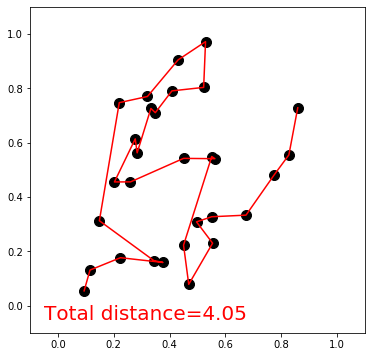

Gen: 96 | best fit: 2766536.47


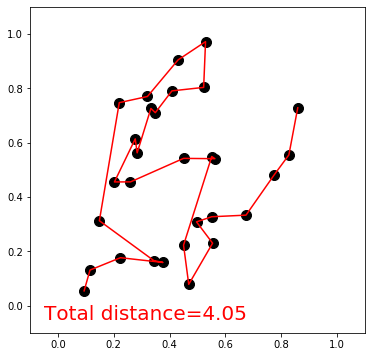

Gen: 97 | best fit: 2766536.47


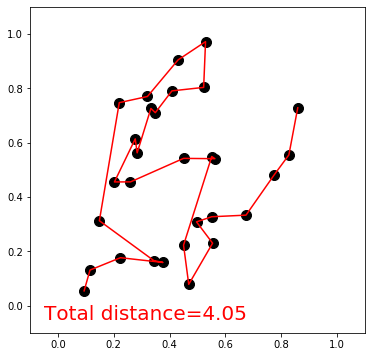

Gen: 98 | best fit: 2766536.47


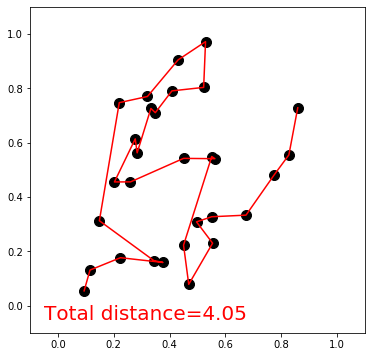

Gen: 99 | best fit: 2766536.47


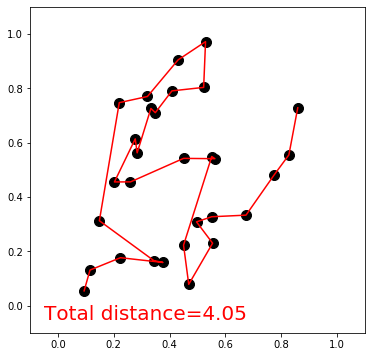

Gen: 100 | best fit: 3271322.46


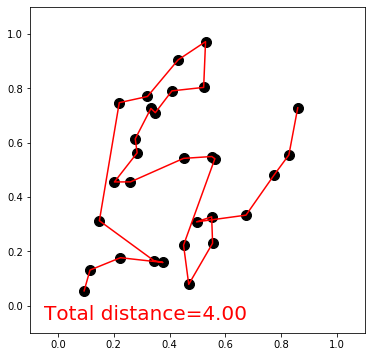

Gen: 101 | best fit: 3271322.46


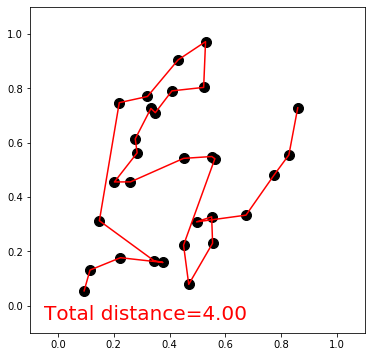

Gen: 102 | best fit: 3271322.46


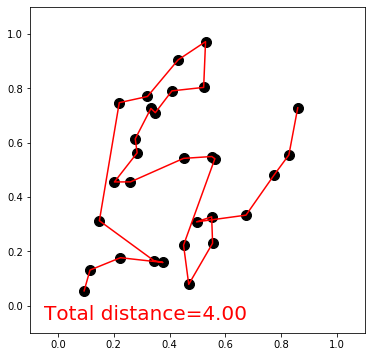

Gen: 103 | best fit: 3271322.46


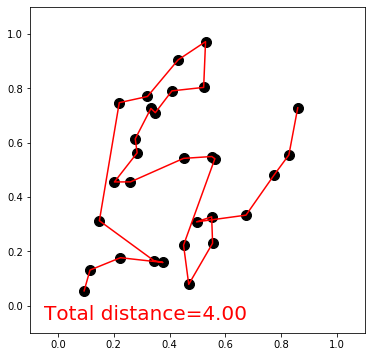

Gen: 104 | best fit: 3271322.46


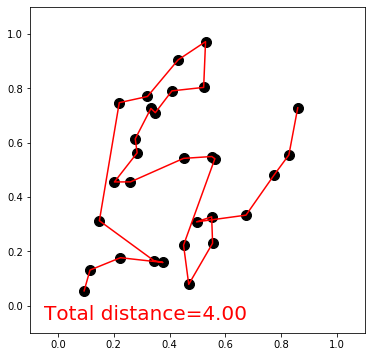

Gen: 105 | best fit: 3271322.46


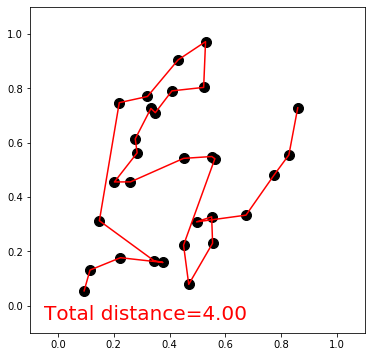

Gen: 106 | best fit: 3817117.39


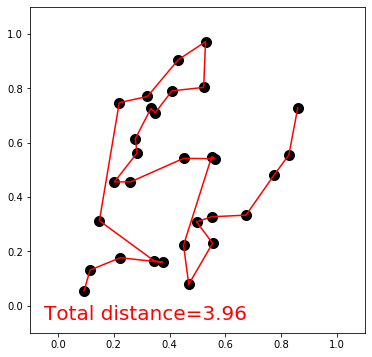

Gen: 107 | best fit: 3817117.39


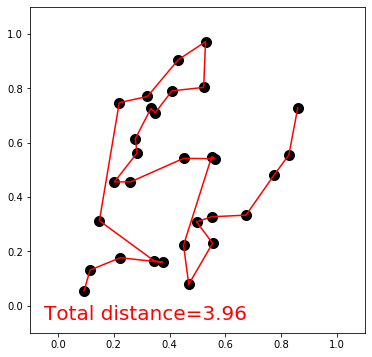

Gen: 108 | best fit: 3817117.39


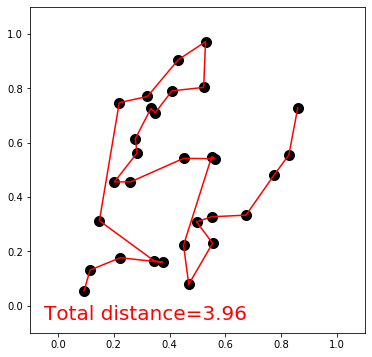

Gen: 109 | best fit: 3817117.39


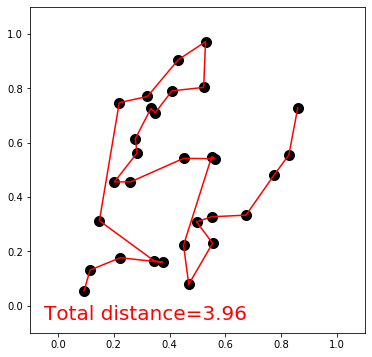

Gen: 110 | best fit: 3817117.39


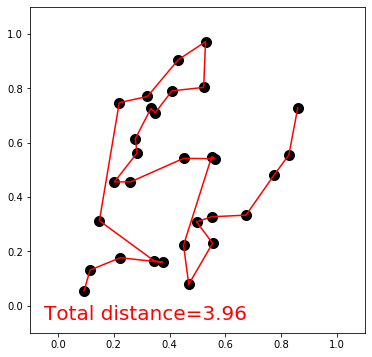

Gen: 111 | best fit: 4044519.38


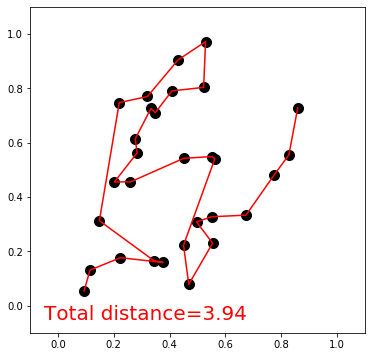

Gen: 112 | best fit: 4044519.38


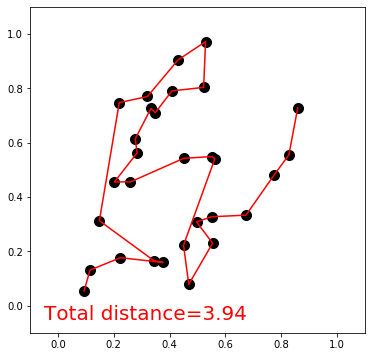

Gen: 113 | best fit: 4044519.38


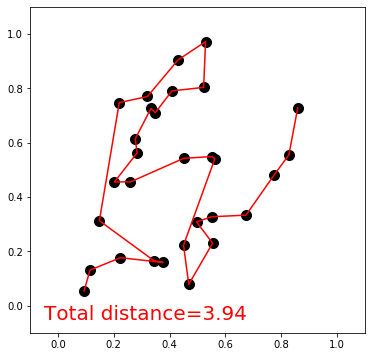

Gen: 114 | best fit: 4044519.38


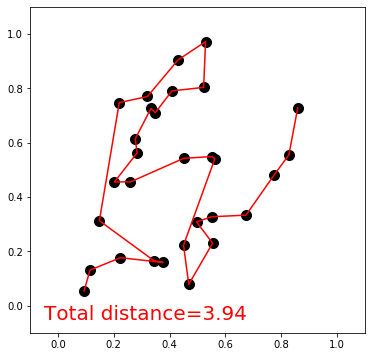

Gen: 115 | best fit: 4044519.38


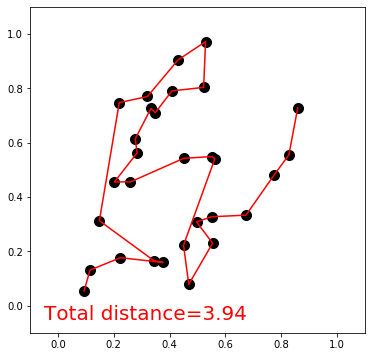

Gen: 116 | best fit: 4044519.38


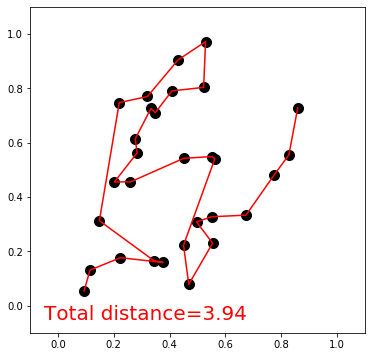

Gen: 117 | best fit: 4044519.38


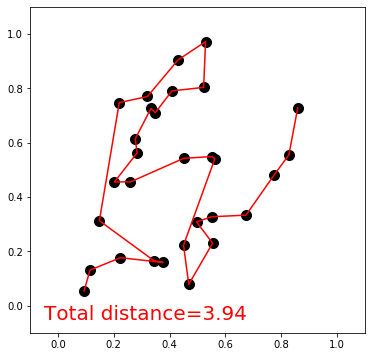

Gen: 118 | best fit: 4044519.38


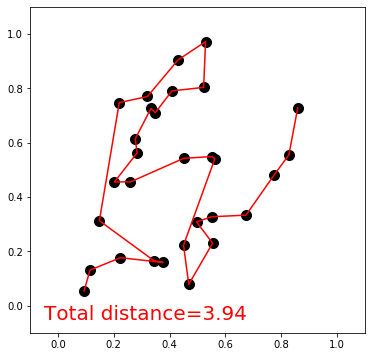

Gen: 119 | best fit: 4044519.38


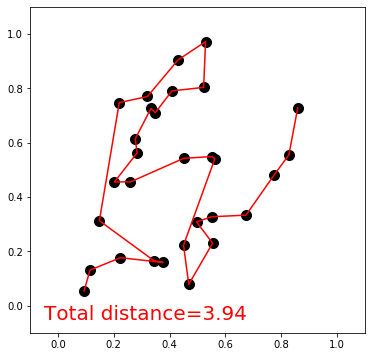

Gen: 120 | best fit: 4044519.38


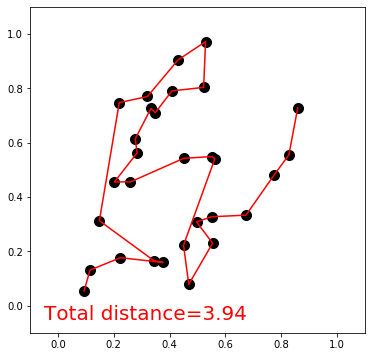

Gen: 121 | best fit: 4044519.38


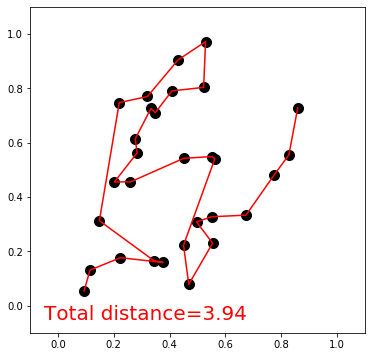

Gen: 122 | best fit: 4044519.38


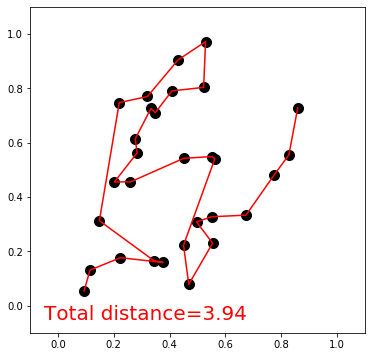

Gen: 123 | best fit: 4044519.38


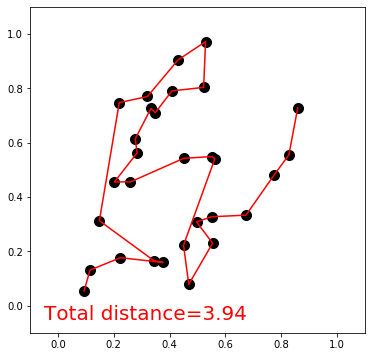

Gen: 124 | best fit: 4044519.38


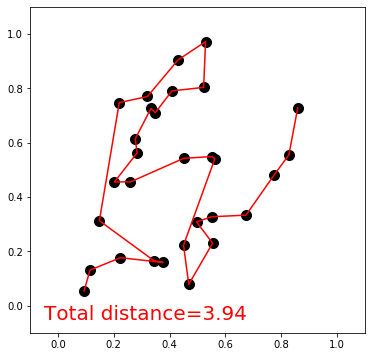

Gen: 125 | best fit: 4044519.38


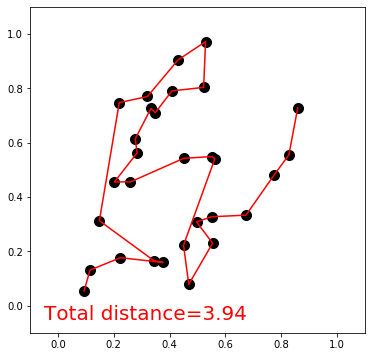

Gen: 126 | best fit: 4044519.38


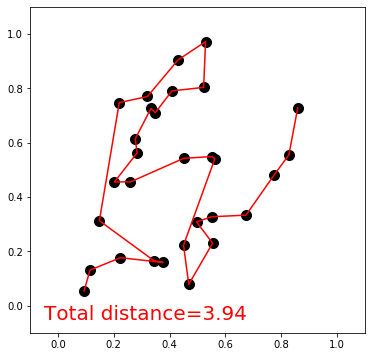

Gen: 127 | best fit: 4044519.38


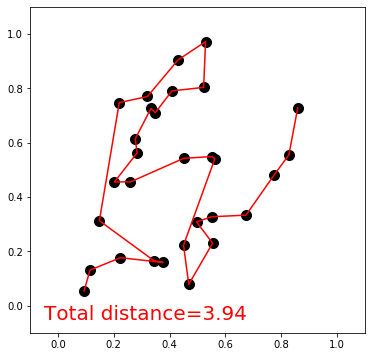

Gen: 128 | best fit: 4085995.39


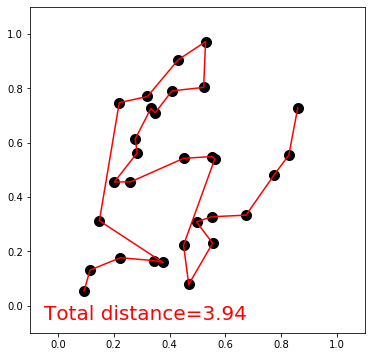

Gen: 129 | best fit: 4085995.39


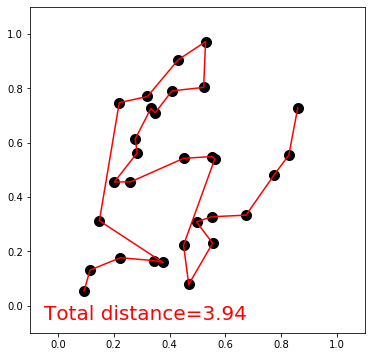

Gen: 130 | best fit: 4131165.85


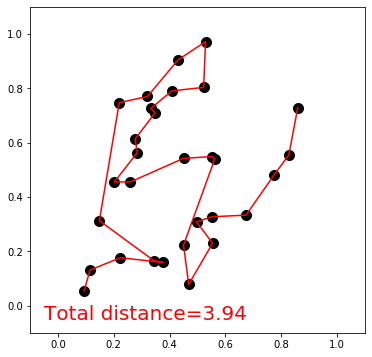

Gen: 131 | best fit: 4478594.95


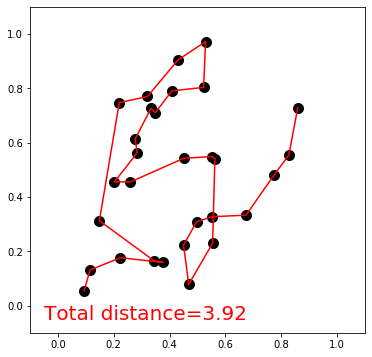

Gen: 132 | best fit: 4478594.95


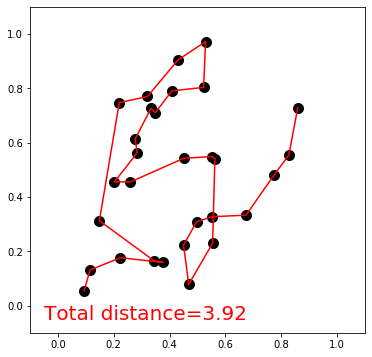

Gen: 133 | best fit: 4478594.95


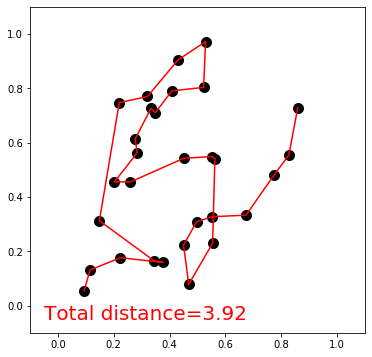

Gen: 134 | best fit: 4478594.95


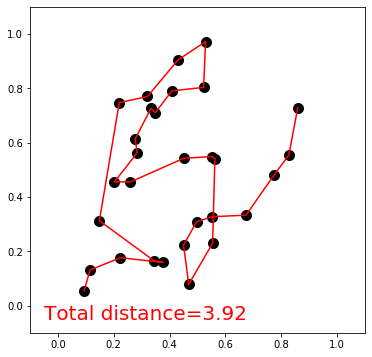

Gen: 135 | best fit: 4478594.95


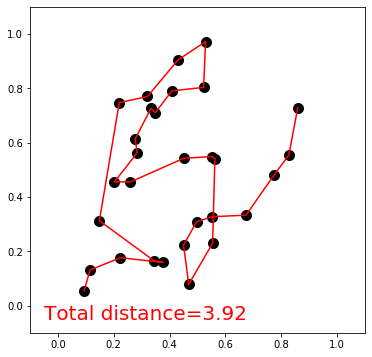

Gen: 136 | best fit: 4131165.85


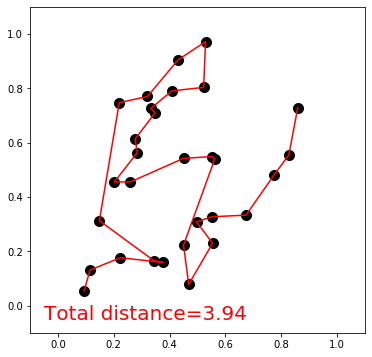

Gen: 137 | best fit: 4131165.85


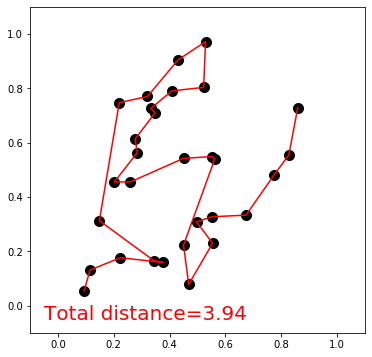

Gen: 138 | best fit: 4044519.38


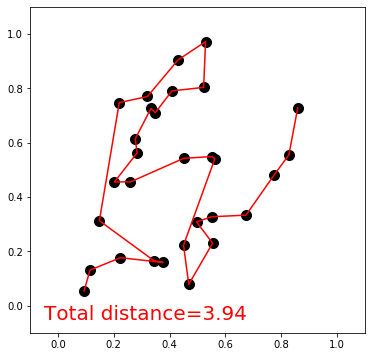

Gen: 139 | best fit: 4085995.39


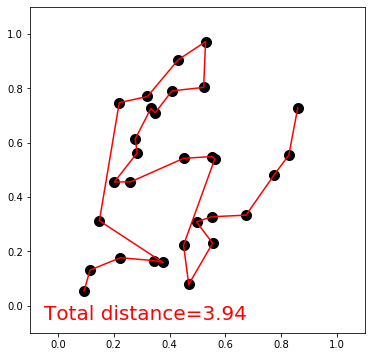

Gen: 140 | best fit: 4085995.39


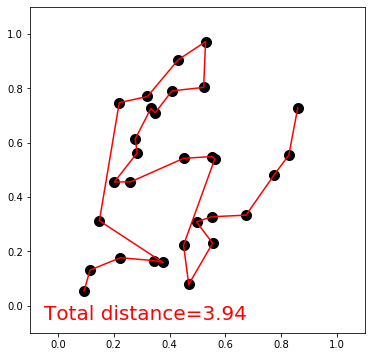

Gen: 141 | best fit: 4085995.39


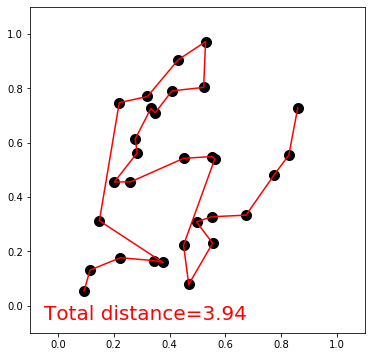

Gen: 142 | best fit: 4160740.93


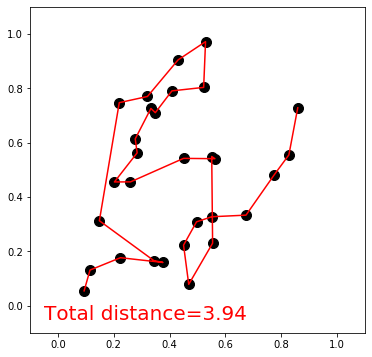

Gen: 143 | best fit: 4160740.93


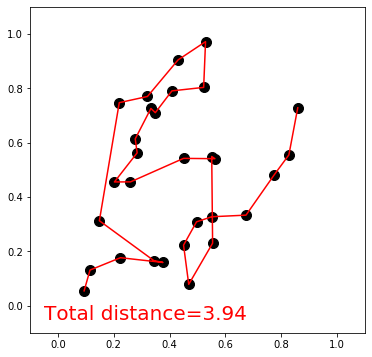

Gen: 144 | best fit: 4160740.93


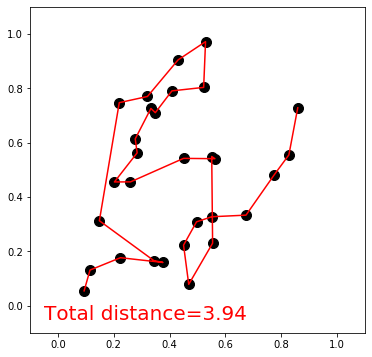

Gen: 145 | best fit: 4160740.93


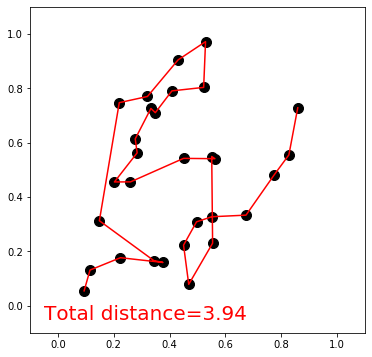

Gen: 146 | best fit: 4085995.39


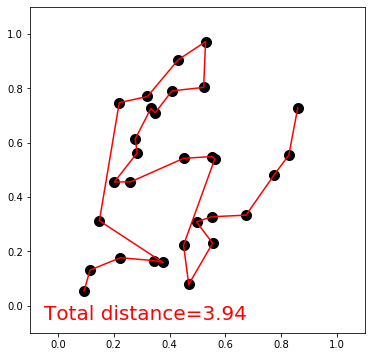

Gen: 147 | best fit: 4085995.39


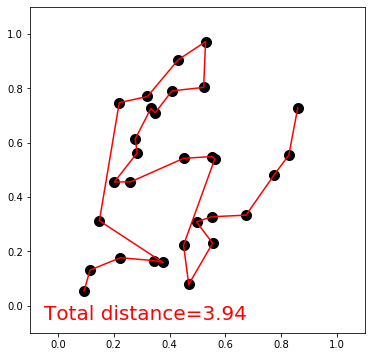

Gen: 148 | best fit: 4478594.95


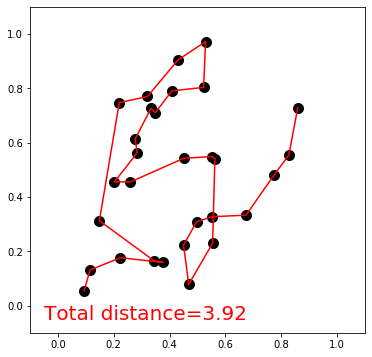

Gen: 149 | best fit: 4478594.95


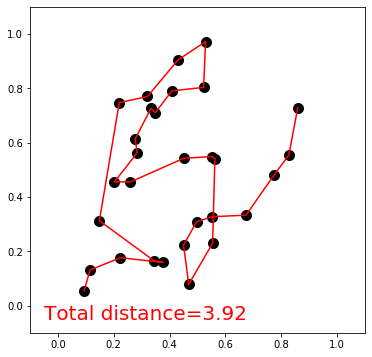

Gen: 150 | best fit: 4478594.95


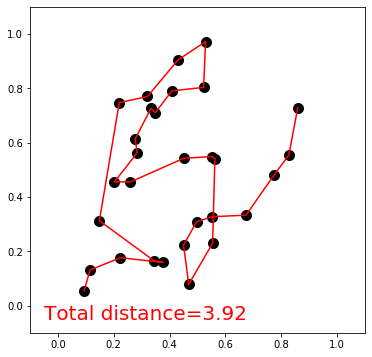

Gen: 151 | best fit: 4478594.95


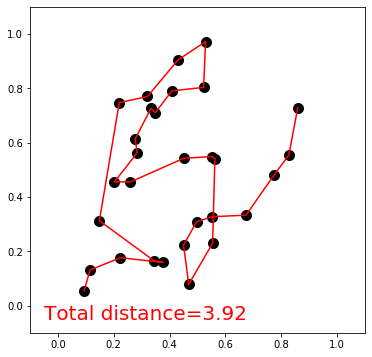

Gen: 152 | best fit: 4478594.95


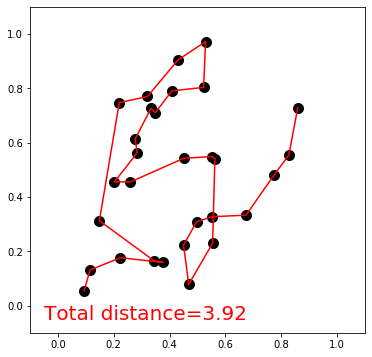

Gen: 153 | best fit: 4478594.95


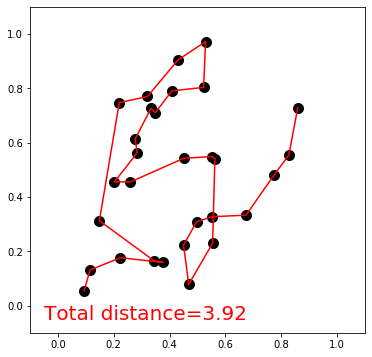

Gen: 154 | best fit: 4478594.95


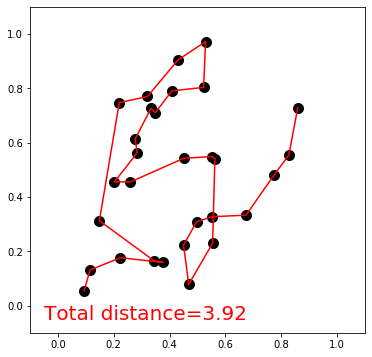

Gen: 155 | best fit: 4478594.95


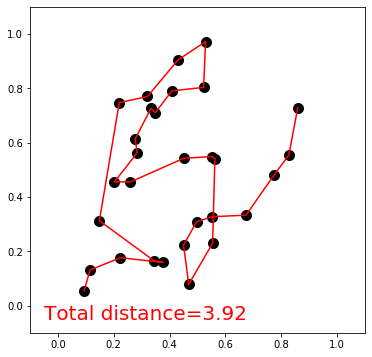

Gen: 156 | best fit: 4478594.95


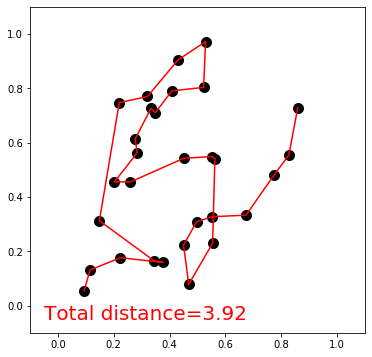

Gen: 157 | best fit: 4478594.95


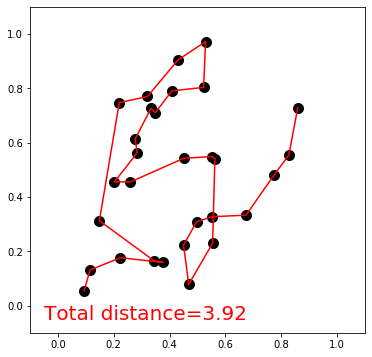

Gen: 158 | best fit: 4478594.95


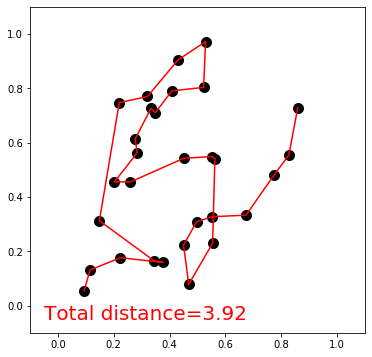

Gen: 159 | best fit: 4478594.95


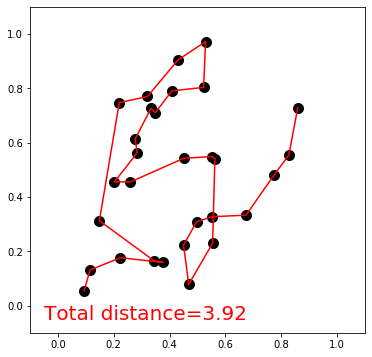

Gen: 160 | best fit: 4478594.95


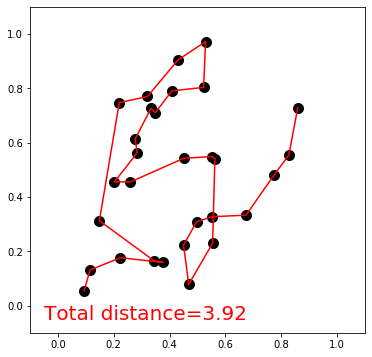

Gen: 161 | best fit: 4478594.95


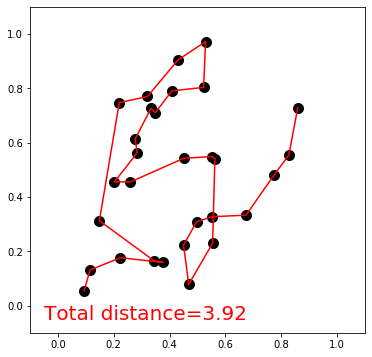

Gen: 162 | best fit: 4478594.95


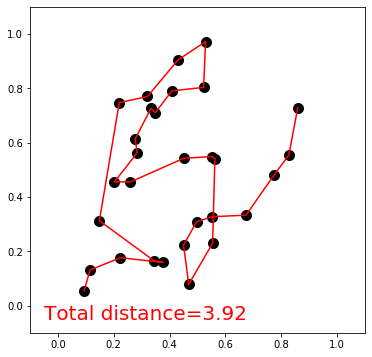

Gen: 163 | best fit: 4478594.95


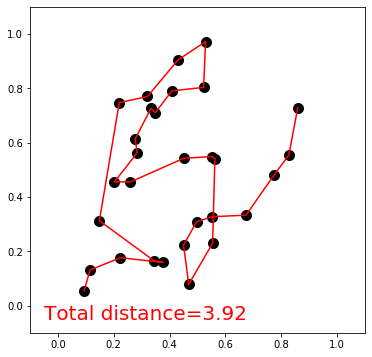

Gen: 164 | best fit: 4478594.95


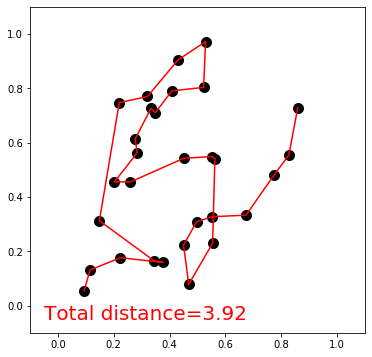

Gen: 165 | best fit: 4478594.95


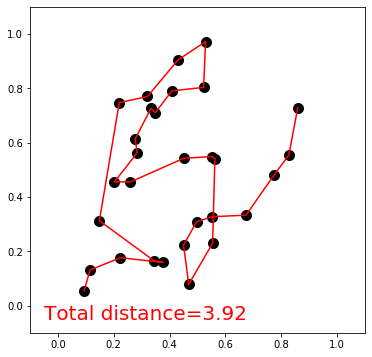

Gen: 166 | best fit: 4478594.95


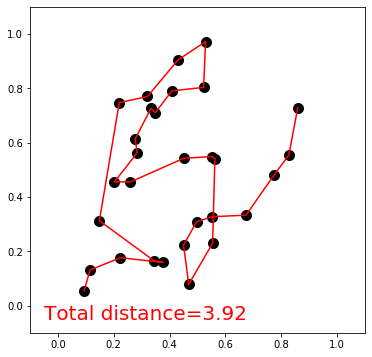

Gen: 167 | best fit: 4478594.95


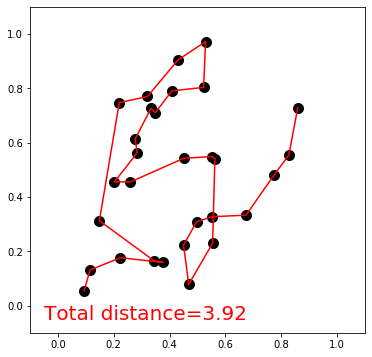

Gen: 168 | best fit: 4478594.95


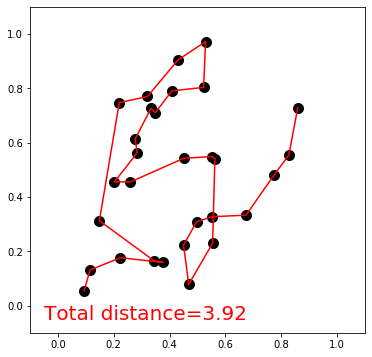

Gen: 169 | best fit: 4478594.95


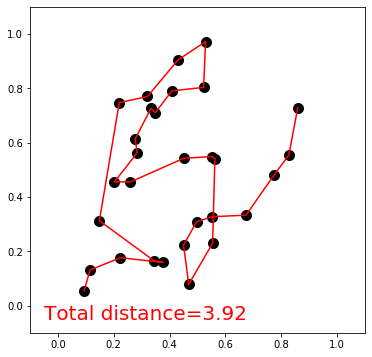

Gen: 170 | best fit: 4478594.95


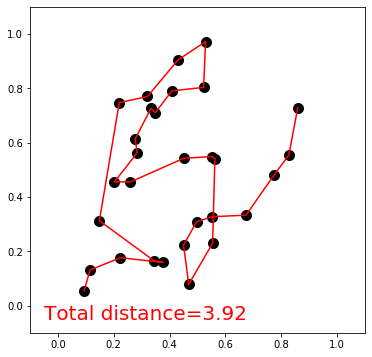

Gen: 171 | best fit: 4478594.95


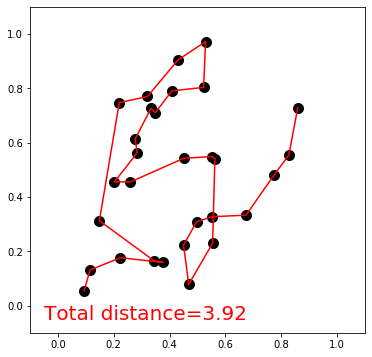

Gen: 172 | best fit: 4478594.95


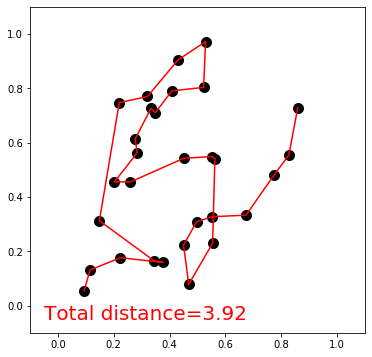

Gen: 173 | best fit: 4478594.95


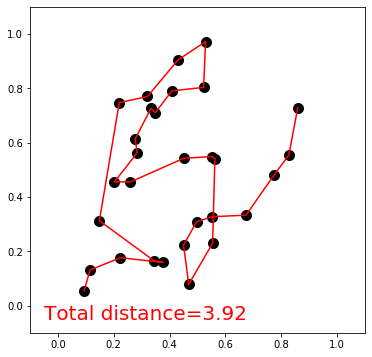

Gen: 174 | best fit: 4478594.95


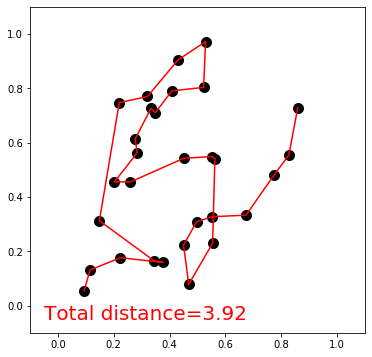

Gen: 175 | best fit: 4478594.95


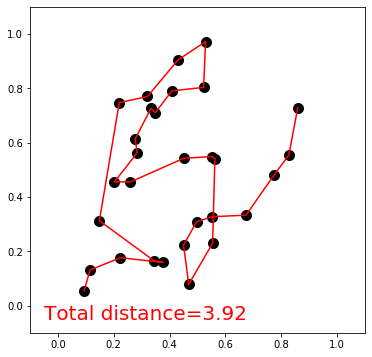

Gen: 176 | best fit: 4478594.95


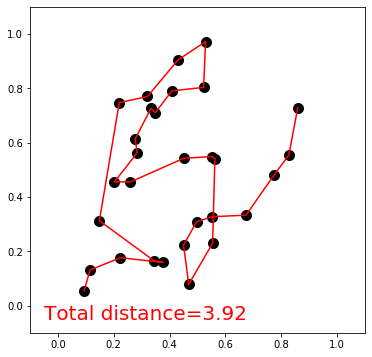

Gen: 177 | best fit: 4478594.95


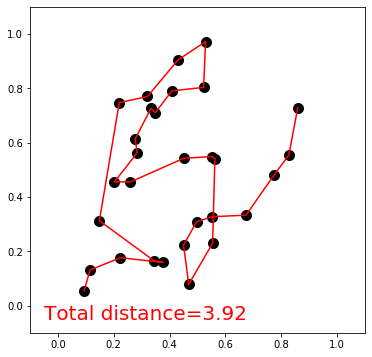

Gen: 178 | best fit: 4478594.95


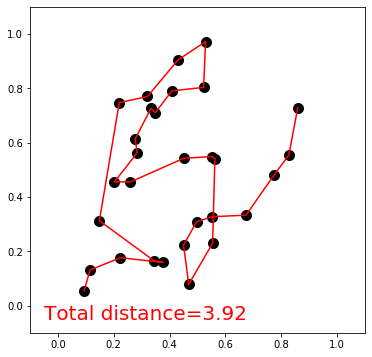

Gen: 179 | best fit: 4478594.95


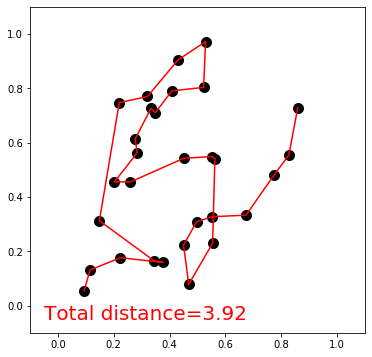

Gen: 180 | best fit: 4478594.95


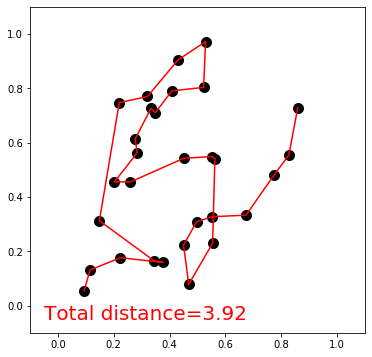

Gen: 181 | best fit: 4525143.37


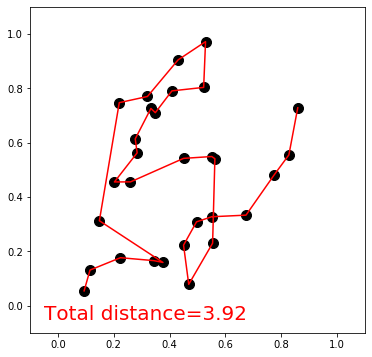

Gen: 182 | best fit: 4525143.37


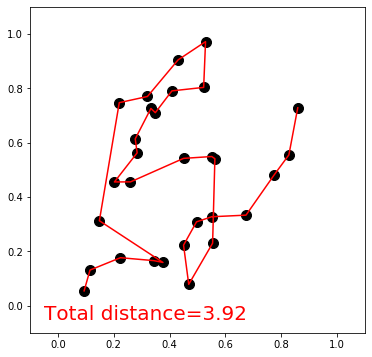

Gen: 183 | best fit: 4525143.37


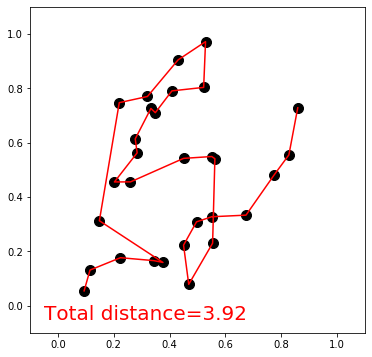

Gen: 184 | best fit: 4525143.37


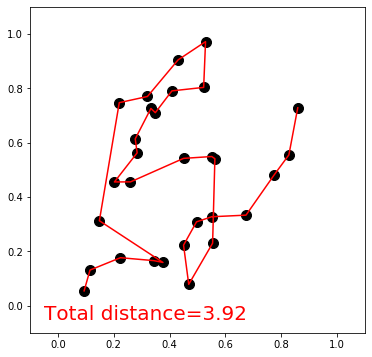

Gen: 185 | best fit: 4525143.37


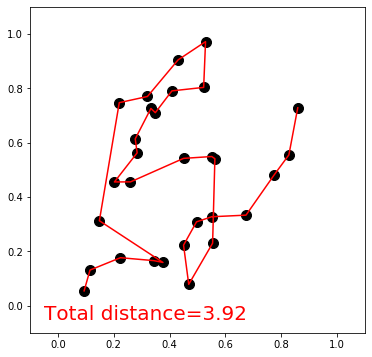

Gen: 186 | best fit: 4478594.95


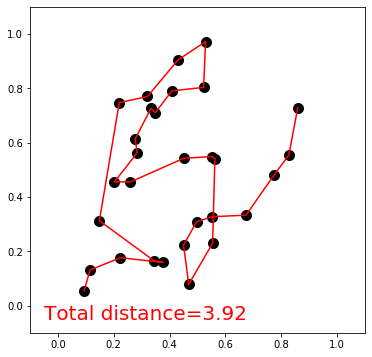

Gen: 187 | best fit: 4525143.37


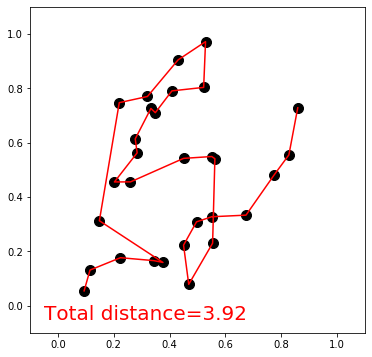

Gen: 188 | best fit: 4525143.37


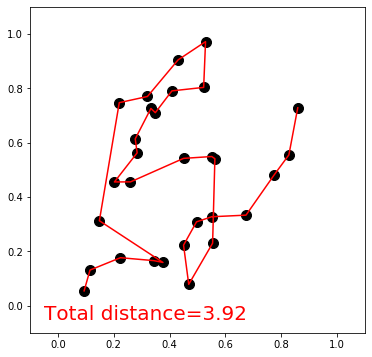

Gen: 189 | best fit: 4525143.37


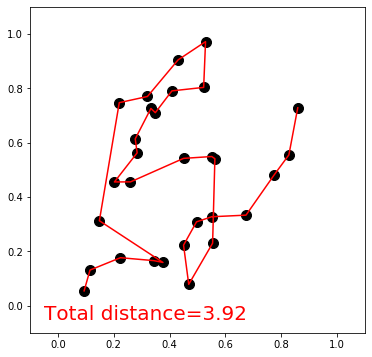

Gen: 190 | best fit: 4478594.95


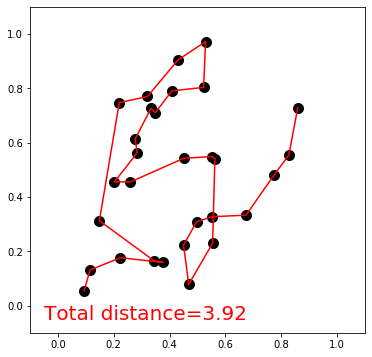

Gen: 191 | best fit: 4575845.77


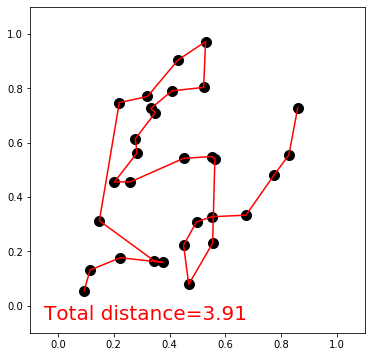

Gen: 192 | best fit: 4478594.95


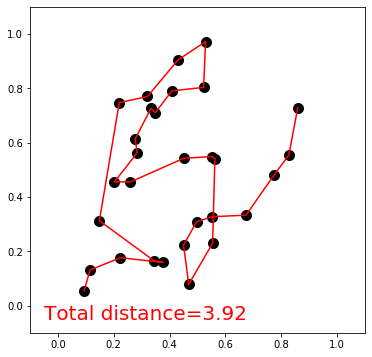

Gen: 193 | best fit: 4478594.95


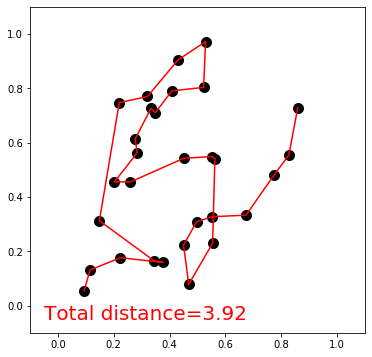

Gen: 194 | best fit: 4478594.95


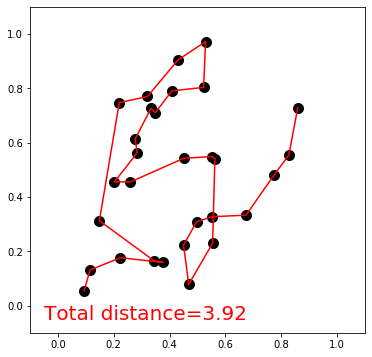

Gen: 195 | best fit: 4525143.37


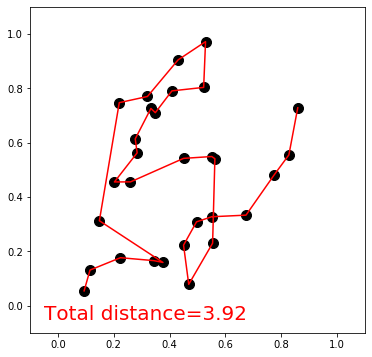

Gen: 196 | best fit: 4525143.37


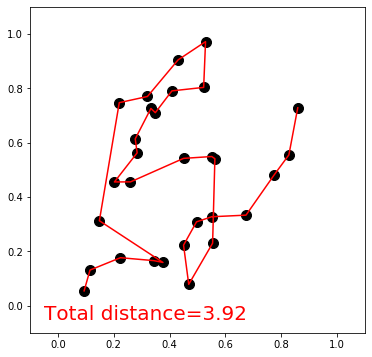

Gen: 197 | best fit: 4478594.95


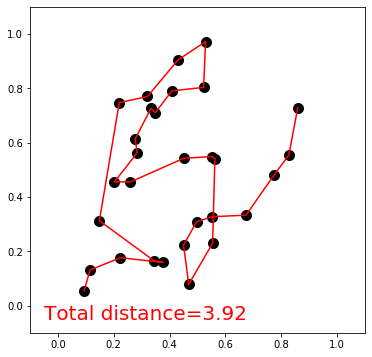

Gen: 198 | best fit: 4478594.95


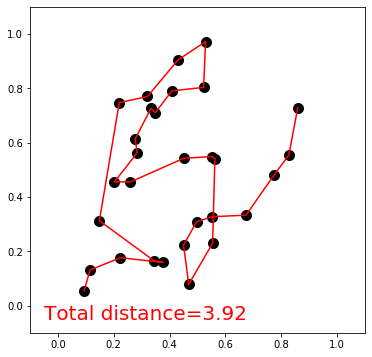

Gen: 199 | best fit: 4478594.95


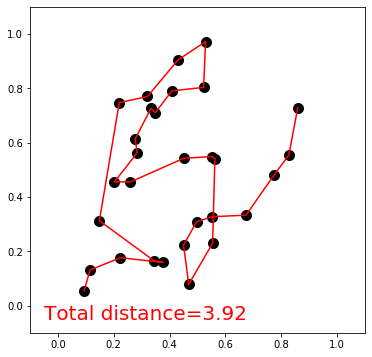

Gen: 200 | best fit: 4478594.95


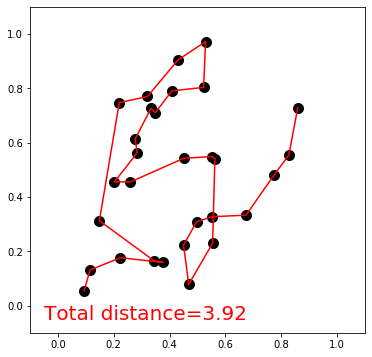

Gen: 201 | best fit: 4575845.77


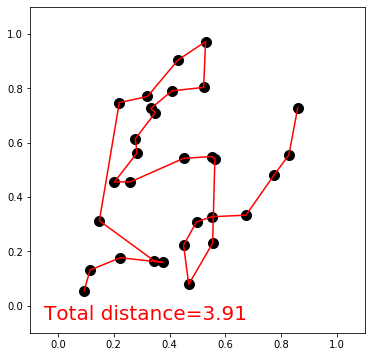

Gen: 202 | best fit: 4575845.77


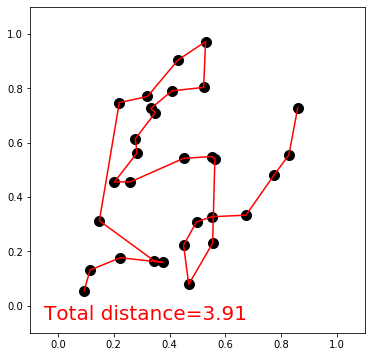

Gen: 203 | best fit: 4575845.77


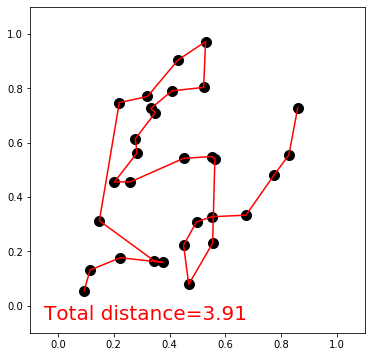

Gen: 204 | best fit: 4575845.77


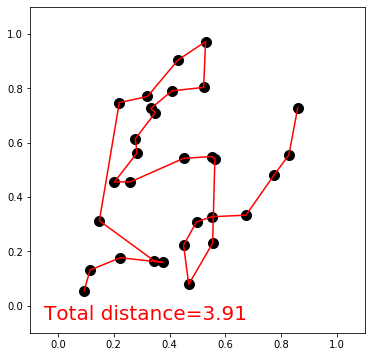

Gen: 205 | best fit: 4575845.77


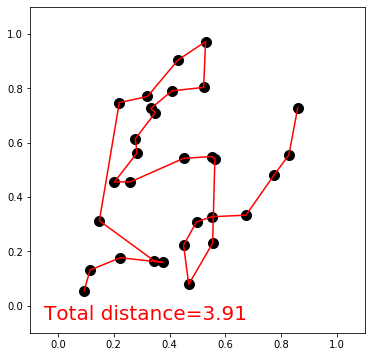

Gen: 206 | best fit: 4575845.77


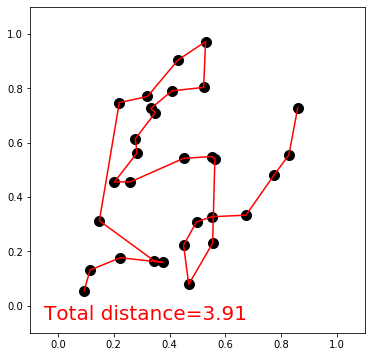

Gen: 207 | best fit: 4575845.77


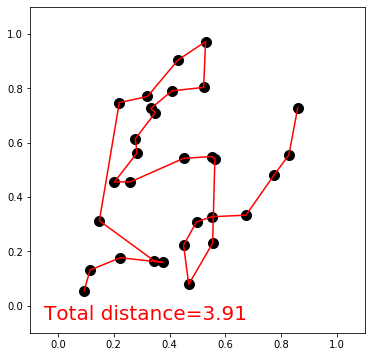

Gen: 208 | best fit: 4575845.77


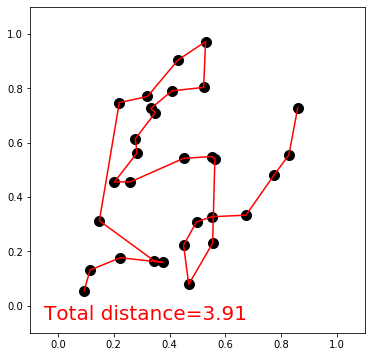

Gen: 209 | best fit: 4575845.77


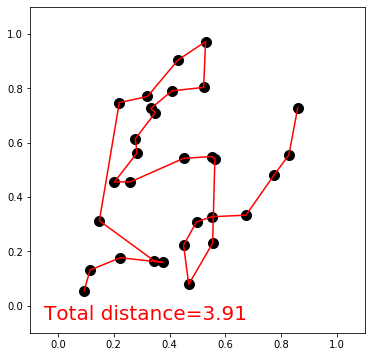

Gen: 210 | best fit: 4575845.77


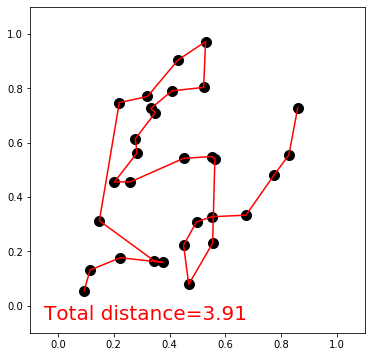

Gen: 211 | best fit: 4575845.77


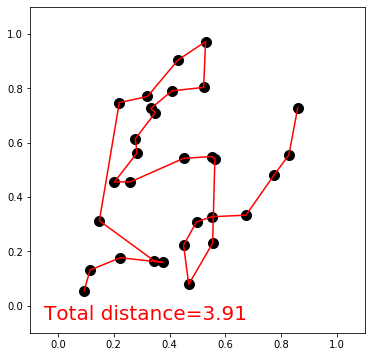

Gen: 212 | best fit: 4575845.77


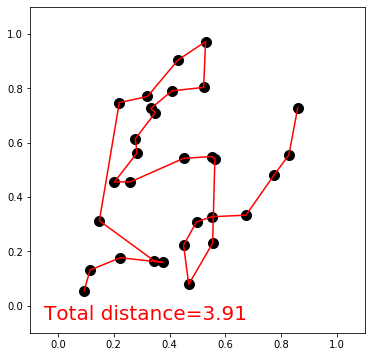

Gen: 213 | best fit: 4575845.77


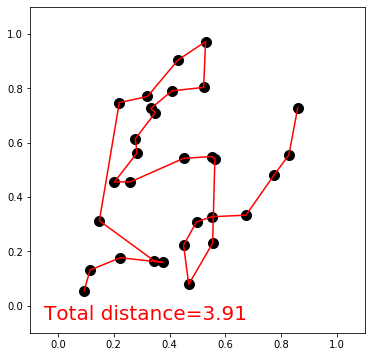

Gen: 214 | best fit: 4575845.77


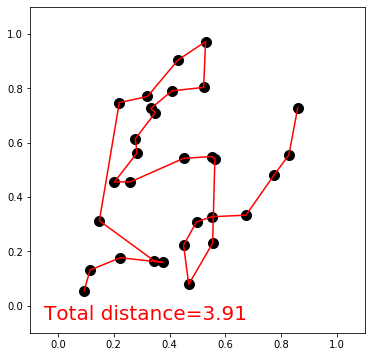

Gen: 215 | best fit: 4575845.77


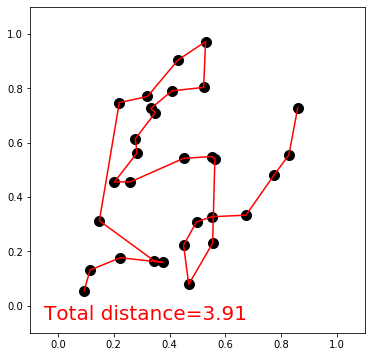

Gen: 216 | best fit: 4575845.77


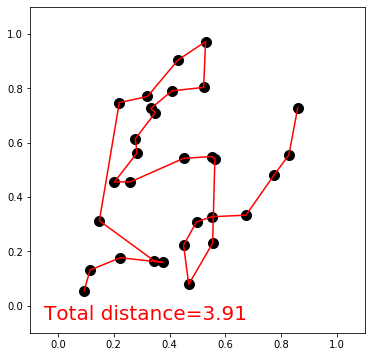

Gen: 217 | best fit: 4575845.77


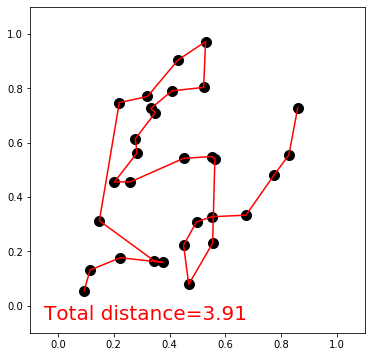

Gen: 218 | best fit: 4575845.77


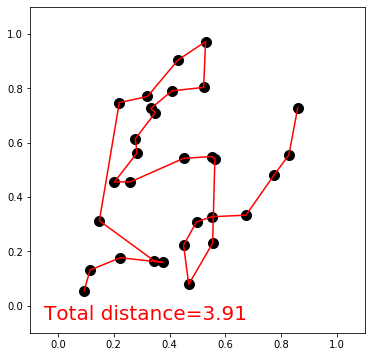

Gen: 219 | best fit: 4575845.77


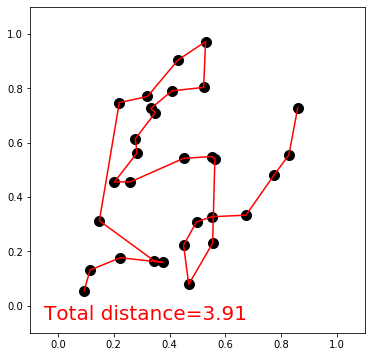

Gen: 220 | best fit: 4575845.77


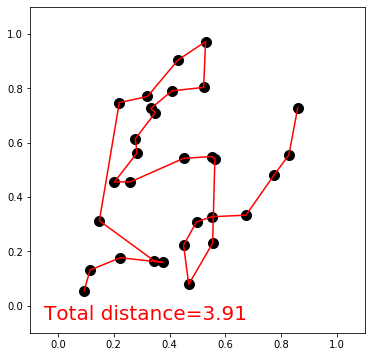

Gen: 221 | best fit: 4575845.77


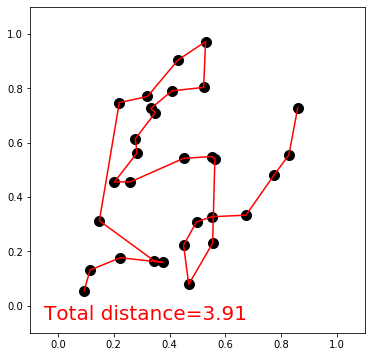

Gen: 222 | best fit: 4575845.77


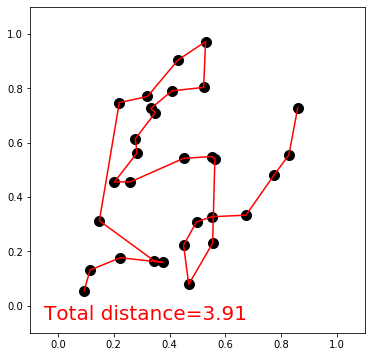

Gen: 223 | best fit: 4623539.22


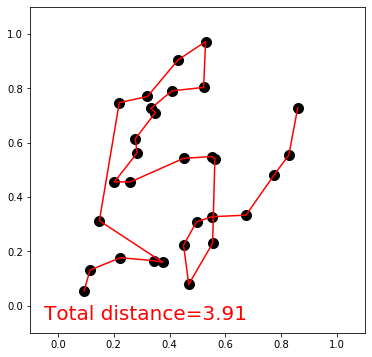

Gen: 224 | best fit: 4623539.22


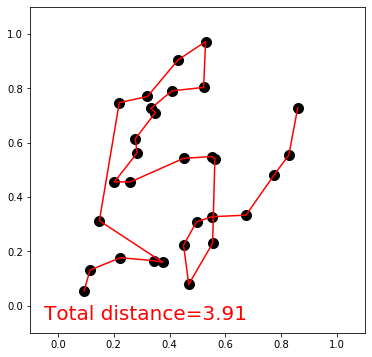

Gen: 225 | best fit: 4623539.22


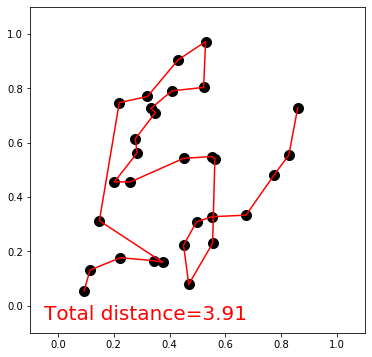

Gen: 226 | best fit: 4623539.22


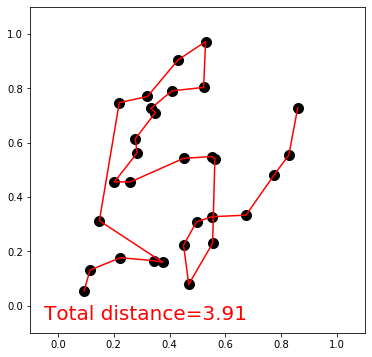

Gen: 227 | best fit: 4623539.22


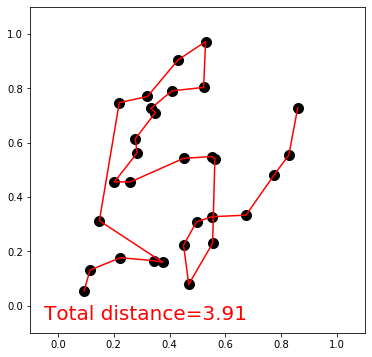

Gen: 228 | best fit: 4623539.22


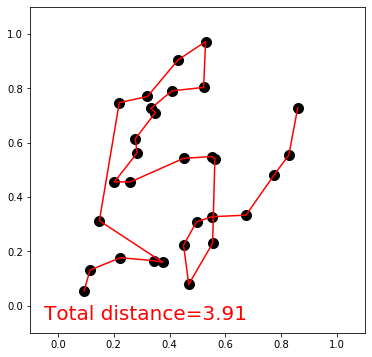

Gen: 229 | best fit: 4623539.22


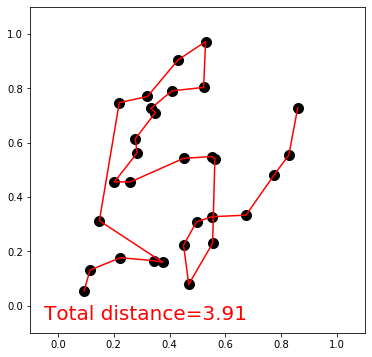

Gen: 230 | best fit: 4623539.22


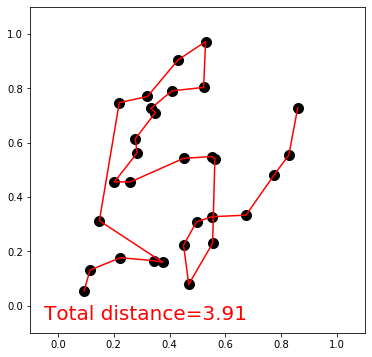

Gen: 231 | best fit: 4623539.22


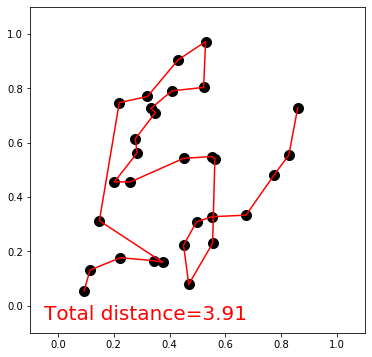

Gen: 232 | best fit: 4623539.22


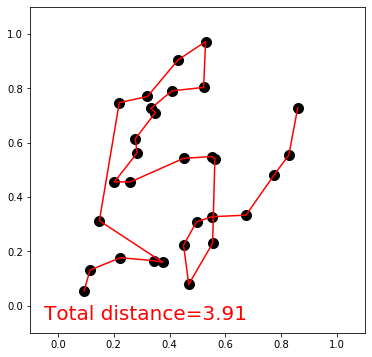

Gen: 233 | best fit: 4623539.22


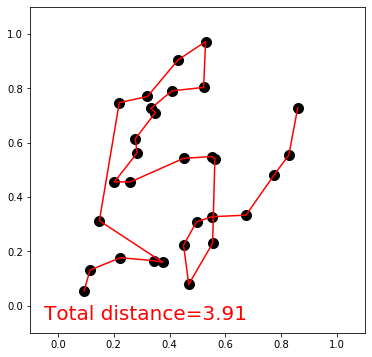

Gen: 234 | best fit: 4575845.77


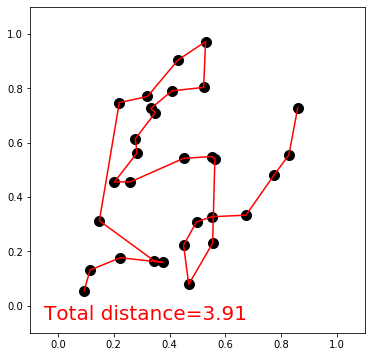

Gen: 235 | best fit: 4575845.77


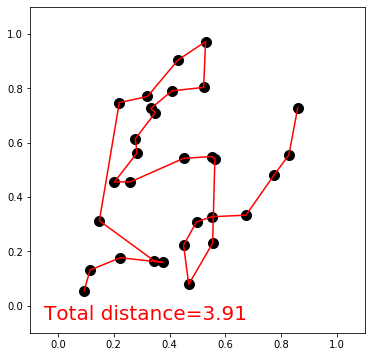

Gen: 236 | best fit: 4575845.77


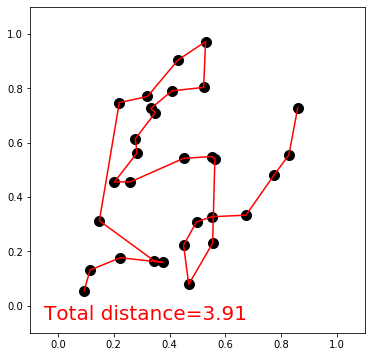

Gen: 237 | best fit: 4575845.77


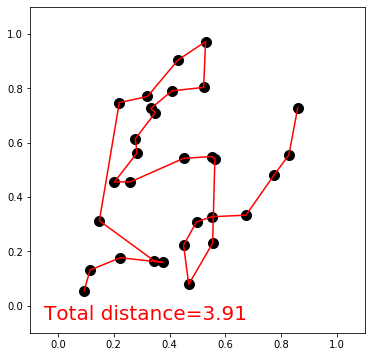

Gen: 238 | best fit: 4575845.77


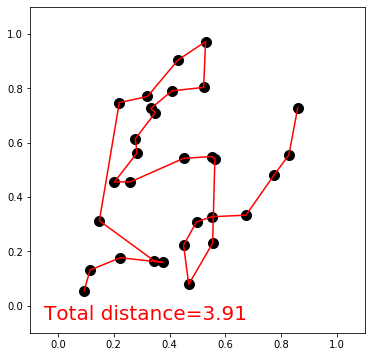

Gen: 239 | best fit: 4575845.77


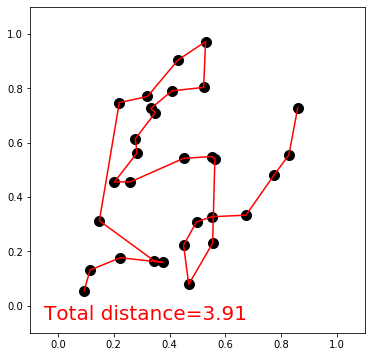

Gen: 240 | best fit: 4575845.77


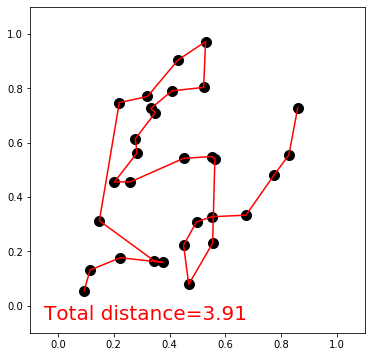

Gen: 241 | best fit: 4575845.77


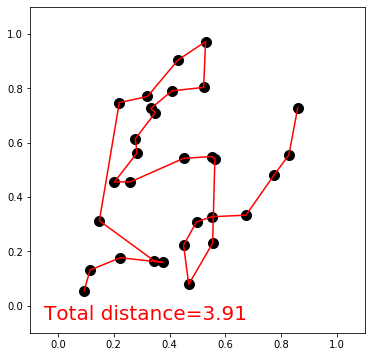

Gen: 242 | best fit: 4575845.77


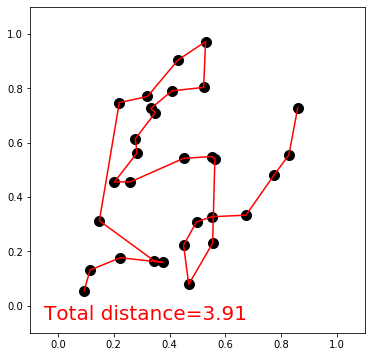

Gen: 243 | best fit: 4575845.77


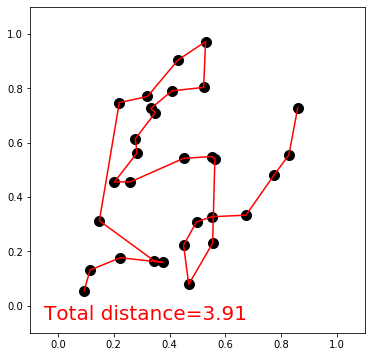

Gen: 244 | best fit: 4575845.77


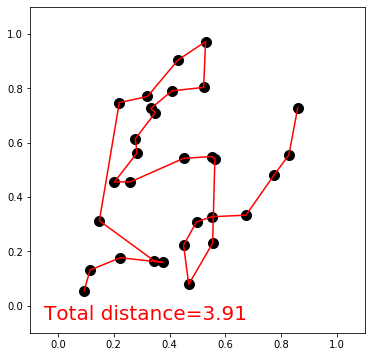

Gen: 245 | best fit: 4575845.77


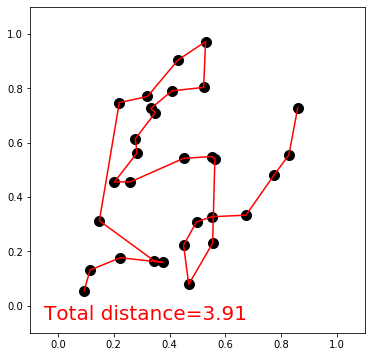

Gen: 246 | best fit: 4575845.77


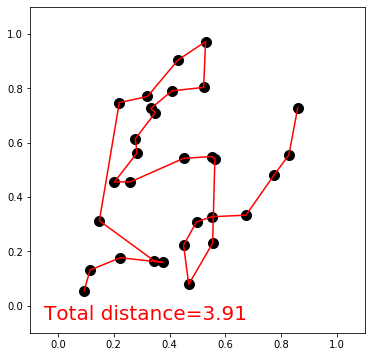

Gen: 247 | best fit: 4575845.77


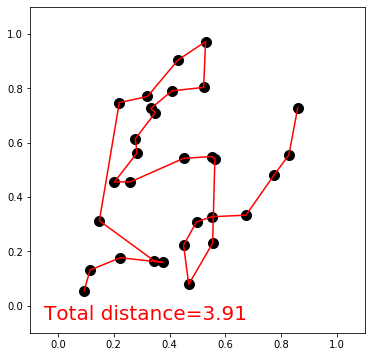

Gen: 248 | best fit: 4575845.77


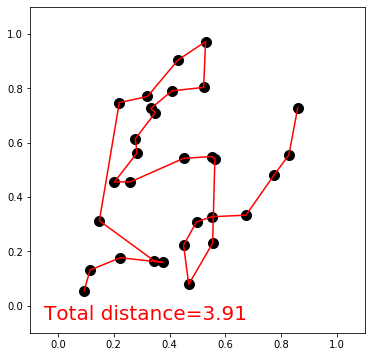

Gen: 249 | best fit: 4575845.77


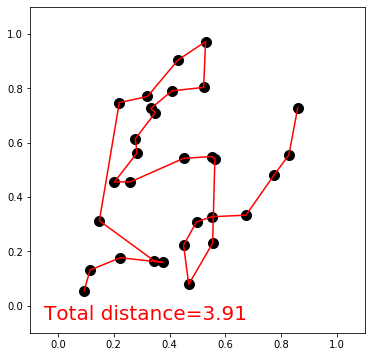

In [7]:
for generation in range(N_GENERATIONS):
    lx, ly = ga.translateDNA(ga.pop, env.city_position)
    fitness, total_distance = ga.get_fitness(lx, ly)
    ga.evolve(fitness)
    best_idx = np.argmax(fitness)
    print('Gen:', generation, '| best fit: %.2f' % fitness[best_idx],)

    env.plotting(lx[best_idx], ly[best_idx], total_distance[best_idx])

plt.ioff()
plt.show()

## Done

In [8]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-10-19 22:17:53.621612
